**Jesse Gempel**

**CMP SCI 4300-001**

**Professor Badri Adhikari**

**12/4/2024**

The **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** dataset is suited for a binary classification problem to determine whether a person is:

1.   Diabetic or prediabetic (classified as **1**)
2.   Non-diabetic (classified as **0**)

This dataset is derived from the "Diabetes Health Indicators Dataset" page on the the Kaggle website. To view the dataset, please visit https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset.  

**Import all necessary libraries before starting**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import random
import time

**Function for determining each model's runtime**

In [ ]:
def print_runtime(start_time, end_time):
  elapsed_time_seconds = int((end_time - start_time))
  elapsed_time_minutes = elapsed_time_seconds // 60
  elapsed_time_hours = elapsed_time_minutes // 60

  elapsed_time_seconds %= 60
  elapsed_time_minutes %= 60

  print(f"\nElapsed time: {elapsed_time_hours} hours, {elapsed_time_minutes} minutes, {elapsed_time_seconds} seconds")

#Phase 1: Data Analysis and Preparation

##1.) Load dataset

In [ ]:
#from google.colab import files

#x = files.upload()

In [ ]:
dataset = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv', delimiter=",")

##2.) Examine the dataset shape, rows, and columns

In [ ]:
print(dataset.shape)

(70692, 22)


The **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** dataset contains **70,692** instances (rows) and **22** features (columns)---21 of which are considered predictors. These features are:

|   | Attribute              | Description                    |
|---|------------------------|--------------------------------|
| 1 | **Diabetes_binary**    | Does patient have diabetes? (**TARGET VARIABLE)**   |
| 2 | HighBP       | Is patient's **blood pressure** high?   |
| 3 | HighChol     | Is patient's **cholesterol** high?
     |
| 4 | CholCheck    | Did patient get a **cholesterol check** in the past 5 years?      |
| 5 | BMI          | What is the patient's **body mass index**?      |
| 6 | Smoker    | Does patient  **smoke**?      |
| 7 | Stroke    | Did patient have a **stroke**?      |
| 8 | HeartDiseaseorAttack    | Did patient ever have a **heart attack**?      |
| 9 | PhysActivity    | Did patient **exercise** in the last 30 days?      |
| 10 | Fruits    | Does patient regularly eat **fruit**? |
| 11 | Veggies    | Does patient regularly eat **vegetables**? |
| 12 | HvyAlcoholConsump    | Does patient drink a lot of **alcohol**? |
| 13 | AnyHealthcare    | Does patient have **health coverage?** |
| 14 | NoDocbcCost    | Did patient need to **see a doctor** but couldn't? |
| 15 | GenHlth    | How is patient's **overall health**? (1 to 5)   |
| 16 | MentHlth    | How many days (0-30) did patient have poor **mental health**?     |
| 17 | PhysHlth    | How many days (0-30) did patient have poor **physical health**?     |
| 18 | DiffWalk    | Does patient struggle with **climbing up stairs**?     |
| 19 | Sex    | What is patient's **sex**?     |
| 20 | Age    | What is patient's **age**?      |
| 21 | Education    | What is patient's **education**?      |
| 22 | Income    | What is patient's **income**?     |




These descriptions were summarized from Kaggle. The link to access fuller descriptions is https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook.

In [ ]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
dataset.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
# .iloc is used to ensure that ALL attribute's values can be seen, unlike the two tables above where they are cut off.

row_number = random.randint(0, len(dataset))
print(f"Attribute information for Row {row_number} out of {len(dataset)} \n\n{dataset.iloc[row_number]}")

Attribute information for Row 67306 out of 70692 

Diabetes_binary          1.0
HighBP                   1.0
HighChol                 1.0
CholCheck                0.0
BMI                     35.0
Smoker                   1.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  5.0
MentHlth                12.0
PhysHlth                25.0
DiffWalk                 1.0
Sex                      1.0
Age                     10.0
Education                5.0
Income                   2.0
Name: 67306, dtype: float64


##3.) Find any missing data

In [ ]:
dataset.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Because every value in the table above contains a 0, it is apparent that no missing data exists in the dataset.

##4.) Clean up attribute titles

In [ ]:
dataset.columns = ('Diabetes (binary target)',
                   'High Blood Pressure (y/n)',
                   'High Cholesterol (y/n)',
                   'Cholesterol Checked (y/n)',
                   'BMI',
                   'Smoke (y/n)',
                   'Stroke (y/n)',
                   'Heart Attack (y/n)',
                   'Exercise (y/n)',
                   'Fruits (y/n)',
                   'Veggies (y/n)',
                   'Heavy Alcohol Consumption (y/n)',
                   'Health Coverage (y/n)',
                   'Cost Prevents Doctor Visit (y/n)',
                   'General Health (1-5)',
                   'Days Poor Mental Health',
                   'Days Poor Physical Health',
                   'Stairs Difficulty (y/n)',
                   'Sex (M/F)',
                   'Age',
                   'Education',
                   'Income')

# Converts column names to list to make specifying columns for describe() method easier.
column_list = dataset.columns.tolist()

##5.) Visualize distribution of the two classes (output labels)

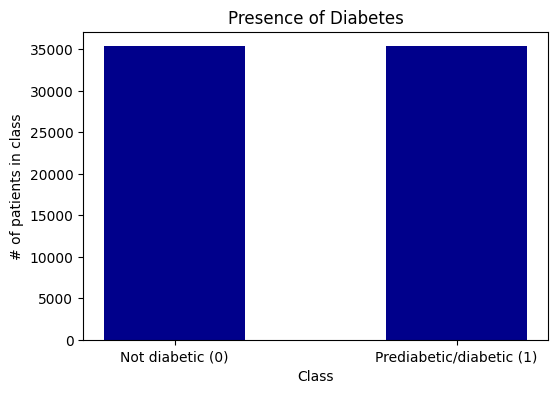

In [ ]:
class_distribution = dataset["Diabetes (binary target)"].value_counts().to_dict()
classes = list(class_distribution.keys())
number_of_patients_in_class = list(class_distribution.values())

fig = plt.figure(figsize = (6, 4))

plt.bar(classes, number_of_patients_in_class, color="darkblue", width=0.5)

plt.xlabel("Class")
plt.xticks([0, 1], ["Not diabetic (0)", "Prediabetic/diabetic (1)"])
plt.ylabel("# of patients in class")
plt.title("Presence of Diabetes")

plt.show()

In [ ]:
diabetic_count = number_of_patients_in_class[1]
non_diabetic_count = number_of_patients_in_class[0]

diabetic_percentage = (diabetic_count / (diabetic_count + non_diabetic_count)) * 100
non_diabetic_percentage = (non_diabetic_count / (diabetic_count + non_diabetic_count)) * 100

print("Class:\t\tDescription:\t\t\t\t\tPatient count:\t\tPercentage:")
print(f"{classes[0]}\t\tNumber of non-diabetic patients\t\t\t{non_diabetic_count}\t\t\t{non_diabetic_percentage}%")
print(f"{classes[1]}\t\tNumber of pre-diabetic/diabetic patients\t{diabetic_count}\t\t\t{diabetic_percentage}%")

Class:		Description:					Patient count:		Percentage:
0.0		Number of non-diabetic patients			35346			50.0%
1.0		Number of pre-diabetic/diabetic patients	35346			50.0%


Upon observing the distribution of the two classes above, it turns out that the data is *equally distributed*. Both classes appear to have exactly **35,346** rows, plus the distribution percentages are exactly **50.0%**. Therefore, it is safe to say that the data is not heavily imbalanced (or even remotely imbalanced at all). We can continue utilizing the dataset to solve this binary classification problem.

##6.) Visualize distribution of all predictors with histogram (input labels)

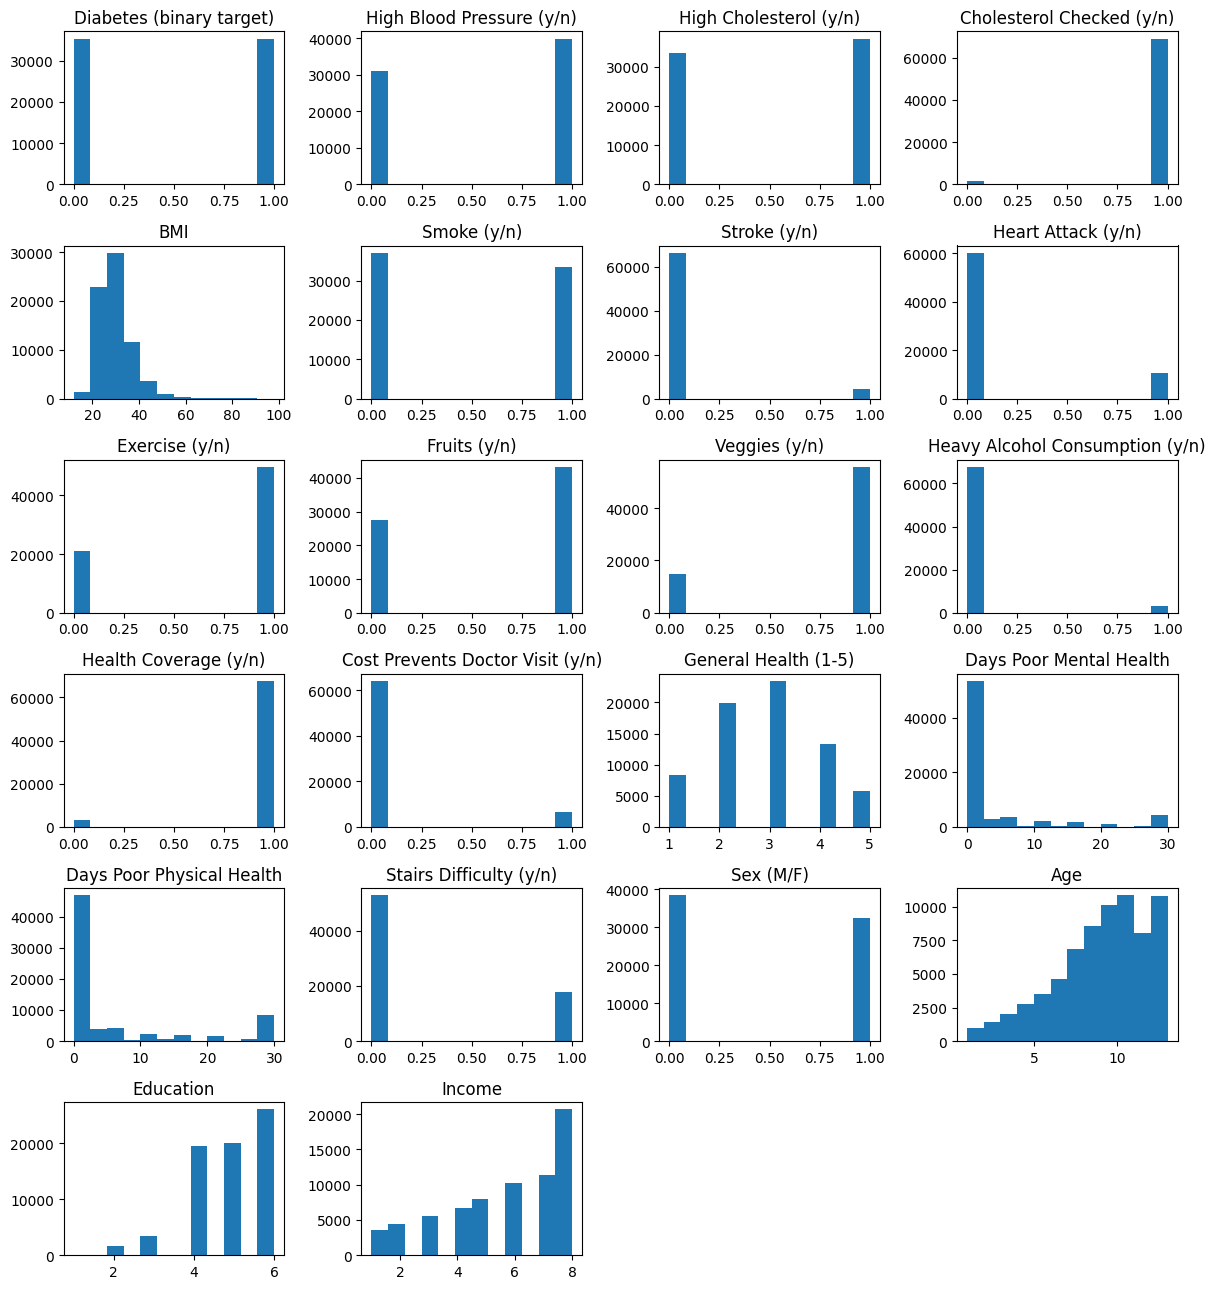

In [ ]:
%matplotlib inline

histogram = dataset.hist(figsize=(12, 13), layout=(6, 4), bins=12, grid=False)

plt.tight_layout()
plt.show()

##7.) Illustrate range of values for predictors

###**7.1: Range of values for predictors 1 through 7**

In [ ]:
dataset[column_list[1:8]].describe()

,High Blood Pressure (y/n),High Cholesterol (y/n),Cholesterol Checked (y/n),BMI,Smoke (y/n),Stroke (y/n),Heart Attack (y/n)
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810
std,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000


For the first seven columns of the dataset, every predictor above (except BMI) appears to have a range between 0 and 1. This scenerio occurs because those attributes only hold binary values (0 or 1). When the data was gathered, each patient was asked yes/no questions about their blood pressure, cholesterol, checking of cholesterol, smoking habits, stroke history, and heart attack history.

As for the **BMI**, around 75 percent of patients have a BMI of 33 or below. For this reason, the histogram above for BMI appears to skew left.

###**7.2: Range of values for predictors 8 through 13**

In [ ]:
dataset[column_list[8:14]].describe()

,Exercise (y/n),Fruits (y/n),Veggies (y/n),Heavy Alcohol Consumption (y/n),Health Coverage (y/n),Cost Prevents Doctor Visit (y/n)
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914
std,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the table above, patients were asked yes/no questions about their exercise habits, fruit/vegetable intake, alcohol intake, health coverage, and their ability to attend doctor's visits due to cost. For this reason, all the quartile values only contain integer values 0 or 1.

###**7.3: Range of values for predictors 14 through 22**

In [ ]:
dataset[column_list[14:22]].describe()

,General Health (1-5),Days Poor Mental Health,Days Poor Physical Health,Stairs Difficulty (y/n),Sex (M/F),Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Quartile values for **Stairs Difficulty** and **Sex (M/F)** are exclusively 0 or 1. This scenario occurs due to the nature of their data holding binary values. The data for the Stairs Difficulty feature was gathered through a yes/no question asked from the doctor to the patient. The Sex (M/F) assigns a 0 for female and a 1 for male.

The **General Health (1-5)** predictor holds data that serves as a rating from 1 to 5. Only 5 possible values exist for that predictor, so the quartiles appear to behave almost uniformly as the values increase.

The **Days Poor Mental Health** and **Days Poor Physical Health** predictors encounter a scenario where the lower quartiles (25%) and medians equal the minima of 0. The distribution of data skews left if one were to visualize those predictors in a histogram.

The **Age** predictor appears to contain values betweel 1 and 13. That is because this particular column places age groups in 13 different categories, as tabulated in https://www.researchgate.net/figure/Variable-AGE5YR-Fourteen-Level-Age-Category-20_tbl3_340098871. Upon observing the source on ResearchGate and the table above, it appears that 50% of individuals observed for the presence of diabetes are at least 60 years old. This observation is valid because any age with a classification of **9** resembles the Age 60-64 group, and values greater than 9 are in older age groups. The data sample appears to contain a much higher proportion of older people, and this relationship can be illustrated as a right-skewed histogram.

The **Education** predictor categorizes values between 1 and 6. This method of categorization can be found on https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/EDUCA?archive=NAHDAP. When comparing the lower quartile to the maximum value, the values range between 4 and 6. This observation dictates that around 75% of people in the study obtained at least a high school degree or GED.

This dataset also uses numbers to illustrate categories for the **Income** predictor. Values 1 through 8 represent an income bracket in which a patient belongs. This breakdown is demonstrated at https://www.icpsr.umich.edu/web/RCMD/studies/34085/datasets/0001/variables/INCOME2?archive=RCMD. The mean and median appear to be around 6, meaning that the average person in the study appears to make between \$35,000 and \$50,000/yr. It can also be said that at least 25% of patients make over \$75,000/yr since the upper quartile (75%) equals the maximum value.

##8.) Illustrate range of values for target variable Diabetes (binary target)

In [ ]:
dataset[column_list[0]].describe()

,Diabetes (binary target)
count,70692.000000
mean,0.500000
std,0.500004
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


The target variable **Diabetes (binary target)** contains an *exactly* equal breakdown of 0's and 1's---0 for if a patient is ***not* diabetic**, and 1 if a patient is either **diabetic or prediabetic**. As a result, the minimum value equals the lower quartile (25%), the maximum value equals the upper quartile (75%), and the median equals the mean.

##9.) Normalize the data

In [ ]:
mean = dataset.mean(axis=0)
stddev = dataset.std(axis=0)

norm_dataset = (dataset - mean) / stddev

##10.) Visualize *normalized* distributions with histogram

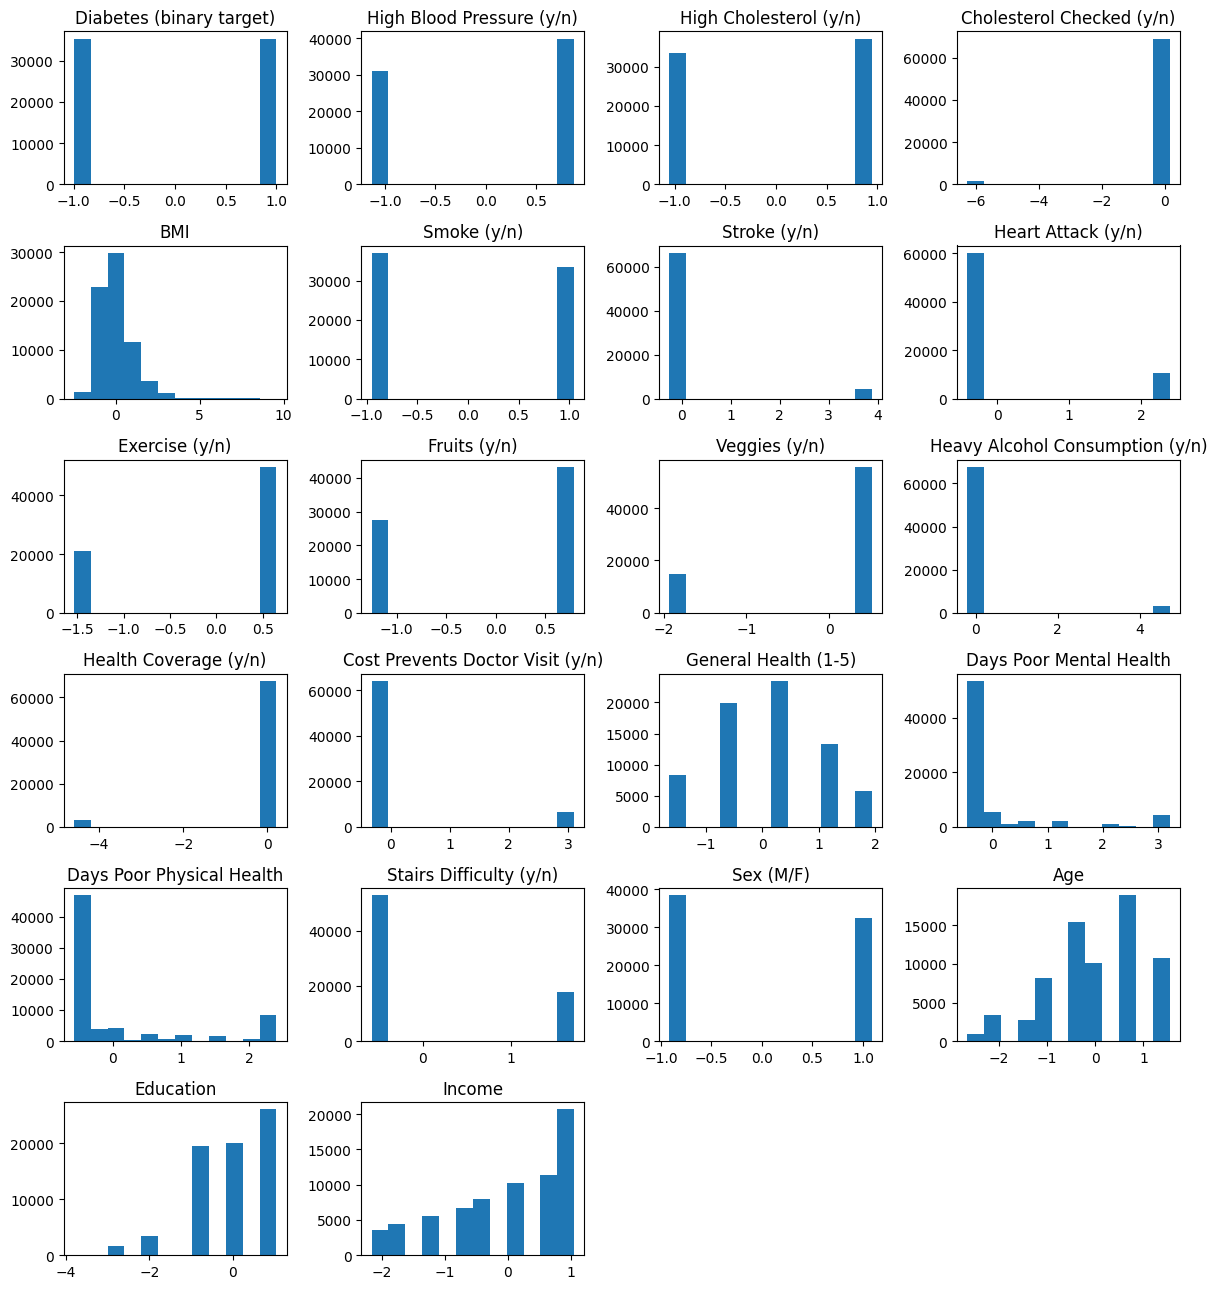

In [ ]:
%matplotlib inline

histogram = norm_dataset.hist(figsize=(12, 13), layout=(6, 4), bins=12, grid=False)

plt.tight_layout()
plt.show()

#Phase 2: Building a Model to Overfit the Dataset

##1.) Select features and target variables

In [ ]:
X = norm_dataset.iloc[:, 1:]
Y = dataset.iloc[:, 0]                      # Use the original output values BEFORE normalization happened.
                                            # That way, the model can continue working with binary output values.
                                            # Output columns are somehow in the FIRST column with this dataset.

##2.) Create an overfitting model

In [ ]:
overfitting_model = Sequential()

overfitting_model.add(Dense(512, activation='sigmoid', input_shape=(X.shape[1],)))
overfitting_model.add(Dense(256, activation='sigmoid'))
overfitting_model.add(Dense(64, activation='sigmoid'))
overfitting_model.add(Dense(32, activation='sigmoid'))
overfitting_model.add(Dense(16, activation='sigmoid'))


overfitting_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
overfitting_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,665 (631.50 KB)

 Trainable params: 161,665 (631.50 KB)

 Non-trainable params: 0 (0.00 B)

##3.) Compile the model

In [ ]:
overfitting_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

##4.) Run the model

In [ ]:
start_time = time.time()

history = overfitting_model.fit(X, Y, epochs = 1000, batch_size = 16)

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6973 - loss: 0.5611
Epoch 2/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7470 - loss: 0.5125
Epoch 3/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.7469 - loss: 0.5139
Epoch 4/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.7474 - loss: 0.5096
Epoch 5/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.7494 - loss: 0.5104
Epoch 6/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7501 - loss: 0.5084
Epoch 7/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.7508 - loss: 0.5064
Epoch 8/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.7527 - loss: 0.5051
Epoch 9/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.7512 - loss: 0.5039
Epoch 10/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.7500 - loss: 0.5063
Epoch 11/1000
4419/4419 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.7523 - loss: 0.50

##5.) Visualize the model's results

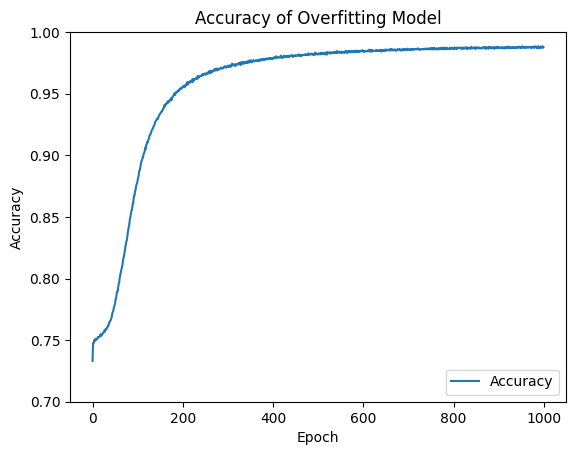

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')

plt.title("Accuracy of Overfitting Model")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

#Phase 3: Selecting and Evaluating Models

##1.) Prepare the models for training

###**1.1: Select features and target variables**

In [ ]:
X = norm_dataset.iloc[:, 1:]
Y = dataset.iloc[:, 0]                      # Use the original output values BEFORE normalization happened.
                                            # That way, the model can continue working with binary output values.
                                            # Output columns are somehow in the FIRST column with this dataset.

data_final = pd.concat([Y, X], axis=1)      # Combine normalized features and target.

In [ ]:
data_final.head()

,Diabetes (binary target),High Blood Pressure (y/n),High Cholesterol (y/n),Cholesterol Checked (y/n),BMI,Smoke (y/n),Stroke (y/n),Heart Attack (y/n),Exercise (y/n),Fruits (y/n),...,Health Coverage (y/n),Cost Prevents Doctor Visit (y/n),General Health (1-5),Days Poor Mental Health,Days Poor Physical Health,Stairs Difficulty (y/n),Sex (M/F),Age,Education,Income
0,0.0,0.880195,-1.052791,0.159275,-0.542172,-0.951704,-0.257472,-0.416467,0.649921,-1.255363,...,0.217173,-0.321943,0.146303,0.153019,2.403991,-0.58155,1.090038,-1.607226,1.048554,1.058152
1,0.0,0.880195,0.949843,0.159275,-0.542172,1.050732,3.883868,-0.416467,-1.538628,0.796571,...,0.217173,-0.321943,0.146303,-0.460055,-0.577446,-0.58155,1.090038,1.197672,1.048554,1.058152
2,0.0,-1.136096,-1.052791,0.159275,-0.542172,-0.951704,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,-1.649731,-0.460055,0.416366,-0.58155,1.090038,1.548285,1.048554,1.058152
3,0.0,0.880195,0.949843,0.159275,-0.261034,1.050732,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,0.146303,-0.460055,-0.279303,-0.58155,1.090038,0.847060,1.048554,1.058152
4,0.0,-1.136096,-1.052791,0.159275,-0.120465,1.050732,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,-0.751714,-0.460055,-0.577446,-0.58155,-0.917386,-0.204777,0.076813,1.058152


###**1.2: Shuffle the rows/samples**

In [ ]:
data_final = data_final.sample(frac=1).reset_index(drop=True)

In [ ]:
data_final.head()

,Diabetes (binary target),High Blood Pressure (y/n),High Cholesterol (y/n),Cholesterol Checked (y/n),BMI,Smoke (y/n),Stroke (y/n),Heart Attack (y/n),Exercise (y/n),Fruits (y/n),...,Health Coverage (y/n),Cost Prevents Doctor Visit (y/n),General Health (1-5),Days Poor Mental Health,Days Poor Physical Health,Stairs Difficulty (y/n),Sex (M/F),Age,Education,Income
0,0.0,-1.136096,-1.052791,0.159275,-1.245016,1.050732,-0.257472,-0.416467,0.649921,-1.255363,...,0.217173,-0.321943,-1.649731,-0.460055,-0.577446,-0.58155,-0.917386,-0.555389,1.048554,1.058152
1,0.0,-1.136096,-1.052791,0.159275,-0.401603,-0.951704,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,-1.649731,-0.460055,-0.577446,-0.58155,-0.917386,1.548285,-0.894928,-1.700220
2,1.0,0.880195,-1.052791,0.159275,1.988067,1.050732,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,0.146303,-0.460055,-0.577446,-0.58155,-0.917386,0.496448,1.048554,0.598424
3,1.0,-1.136096,-1.052791,0.159275,1.004085,-0.951704,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,1.044320,0.153019,-0.478065,-0.58155,-0.917386,-1.957838,1.048554,1.058152
4,0.0,-1.136096,-1.052791,0.159275,-1.526153,1.050732,-0.257472,-0.416467,0.649921,0.796571,...,0.217173,-0.321943,-0.751714,-0.460055,-0.577446,-0.58155,-0.917386,-0.204777,0.076813,-0.321034


###**1.3: Divide data into training and validation sets**

For the splitting of the training and validation sets, we will divide the **Diabetes Health Indicators Dataset** from Kaggle in this manner:

*   70% training
*   30% validation



In [ ]:
data_30_percent = int(0.3 * len(data_final))

In [ ]:
X_training = data_final.iloc[:data_30_percent, 1:]
Y_training = data_final.iloc[:data_30_percent, 0]

X_validation = data_final.iloc[data_30_percent:, 1:]
Y_validation = data_final.iloc[data_30_percent:, 0]

###**1.4: Review the shapes of each set**

In [ ]:
print("X_training shape:\t", X_training.shape)
print("Y_training shape:\t", Y_training.shape)
print("X_validation shape:\t", X_validation.shape)
print("Y_validation shape:\t", Y_validation.shape)

print("\nX shape:\t\t", X.shape)
print("Y shape:\t\t", Y.shape)

X_training shape:	 (21207, 21)
Y_training shape:	 (21207,)
X_validation shape:	 (49485, 21)
Y_validation shape:	 (49485,)

X shape:		 (70692, 21)
Y shape:		 (70692,)


###**1.5: Determine a random baseline classifier**

The **random baseline classifier** is an entity that results in a model performance comparison metric. The classifier will be based on the size of each of the data's classes. To elaborate, the accuracy of the random baseline classifier will *equal* the percentage of samples inside the largest class.

**Review class distribution**

As a recap, a binary value of **0** indicates that a patient does *not* have diabetes, and a value of **1** resembles a patient *with* diabetes (or a prediabetic condition).

In [ ]:
print(class_distribution)

{0.0: 35346, 1.0: 35346}


**Determine the larget class in the dataset**

In [ ]:
largest_class_size = max(zip(class_distribution.keys(), class_distribution.values()))[1]
print("Largest class size:", largest_class_size)

Largest class size: 35346


In this particular scenario, the two class sizes are exactly equal. No class can be considered the largest, so the random baseline classifer's accuracy will be **50%**. That means that any model created at this point needs to perform better than a 50% accuracy.

In [ ]:
data_size = dataset.shape[0]

random_baseline_accuracy = (largest_class_size / data_size) * 100
print(f"Random baseline accuracy: {random_baseline_accuracy}%")

Random baseline accuracy: 50.0%


##2.) Initialize NumPy arrays for metric storage

In [ ]:
# There are a total of 7 models in Phase 3, plus the random baseline classifier.
# This value distinguishes the models for table and chart storage.
num_models = 8

# These NumPy arrays will store the accuracies for tabular visualization.
training_accuracies = np.zeros((num_models, 1), dtype=float)
validation_accuracies = np.zeros((num_models, 1), dtype=float)

# These are the accuracies for the Random Baseline Classifier. They will be placed in a table.
training_accuracies[0] = 50.0
validation_accuracies[0] = 50.0

# These 12 NumPy arrays will store loss, recall, F1-score, ROC, AUC, parameter, and epoch information for visualization usage.
training_losses = np.zeros((num_models, 1), dtype=float)
validation_losses = np.zeros((num_models, 1), dtype=float)

training_recalls = np.zeros((num_models, 1), dtype=float)
validation_recalls = np.zeros((num_models, 1), dtype=float)

training_f1_scores = np.zeros((num_models, 1), dtype=float)
validation_f1_scores = np.zeros((num_models, 1), dtype=float)

training_roc_scores = np.zeros((num_models, 1), dtype=float)
validation_roc_scores = np.zeros((num_models, 1), dtype=float)

training_auc_scores = np.zeros((num_models, 1), dtype=float)
validation_auc_scores = np.zeros((num_models, 1), dtype=float)

parameter_counts = np.zeros((num_models, 1), dtype=int)
epoch_counts = np.zeros((num_models, 1), dtype=int)

##3.) Run simple logistic regression model

###**3.1: Create the model**

In [ ]:
model_number = 1

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number] = model.count_params()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

###**3.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1322/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - auc: 0.6303 - loss: 0.7068 - recall: 0.6162
Epoch 1: val_loss improved from inf to 0.51976, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5956 - auc: 0.6308 - loss: 0.7064 - recall: 0.6166 - val_accuracy: 0.7430 - val_auc: 0.8185 - val_loss: 0.5198 - val_recall: 0.7625
Epoch 2/200
1306/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - auc: 0.8269 - loss: 0.5084 - recall: 0.7689
Epoch 2: val_loss improved from 0.51976 to 0.51491, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7486 - auc: 0.8269 - loss: 0.5085 - recall: 0.7689 - val_accuracy: 0.7464 - val_auc: 0.8230 - val_loss: 0.5149 - val_recall: 0.7655
Epoch 3/200
1312/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - auc: 0.8238 - loss: 0.5125 - recall: 0.7701
Epoch 3: val_loss did not improve from 0.51491
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 

###**3.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7450 - auc: 0.8225 - loss: 0.5143 - recall: 0.7642
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - auc: 0.8249 - loss: 0.5128 - recall: 0.7650


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train = model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	75.11% 		74.64%
Loss: 		0.5087		0.5149
Recall: 	0.7727 		0.7655
F1-score: 	0.7556 		0.7515
ROC score: 	0.826870 	0.823051
AUC score: 	0.826881 	0.823048

Predictions: [[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 42


###**3.4: Visualize the model's results**

<ipython-input-337-7ab2fbed3a8f>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-337-7ab2fbed3a8f>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


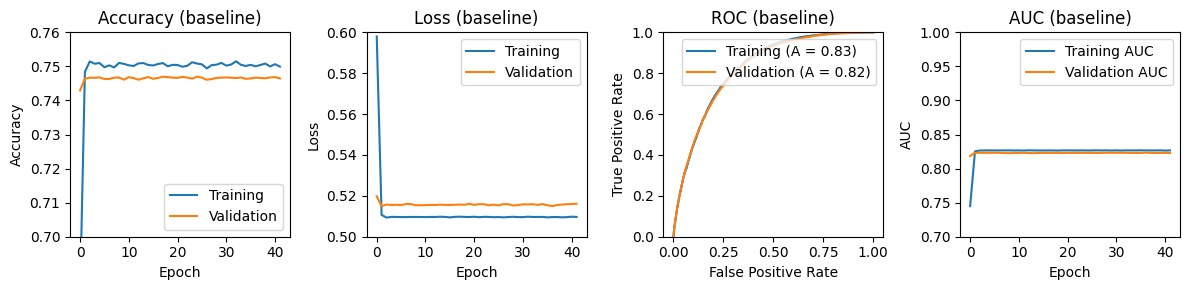

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (baseline)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.76])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (baseline)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.5, 0.6])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (baseline)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='upper right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (baseline)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.7, 1])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##4.) Run **(128-64-32-16-1)** architecture neural network

####**4.1: Create the model**

In [ ]:
model_number = 2

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number] = model.count_params()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

####**4.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1323/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7387 - auc: 0.8081 - loss: 0.5282 - recall: 0.7835
Epoch 1: val_loss improved from inf to 0.52726, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7387 - auc: 0.8081 - loss: 0.5282 - recall: 0.7836 - val_accuracy: 0.7469 - val_auc: 0.8228 - val_loss: 0.5273 - val_recall: 0.8088
Epoch 2/200
1308/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - auc: 0.8267 - loss: 0.5073 - recall: 0.8047
Epoch 2: val_loss improved from 0.52726 to 0.51188, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7526 - auc: 0.8267 - loss: 0.5073 - recall: 0.8046 - val_accuracy: 0.7475 - val_auc: 0.8246 - val_loss: 0.5119 - val_recall: 0.8194
Epoch 3/200
1318/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7576 - auc: 0.8311 - loss: 0.5003 - recall: 0.8180
Epoch 3: val_loss did not improve from 0.51188
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 1

####**4.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7653 - auc: 0.8393 - loss: 0.4894 - recall: 0.7977
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7520 - auc: 0.8267 - loss: 0.5088 - recall: 0.7811


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	76.74% 		74.92%
Loss: 		0.4844		0.5118
Recall: 	0.8019 		0.7802
F1-score: 	0.7745 		0.7571
ROC score: 	0.844410 	0.824308
AUC score: 	0.844418 	0.824284

Predictions: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 48


####**4.4: Visualize the model's results**

<ipython-input-261-263203cd100f>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-261-263203cd100f>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


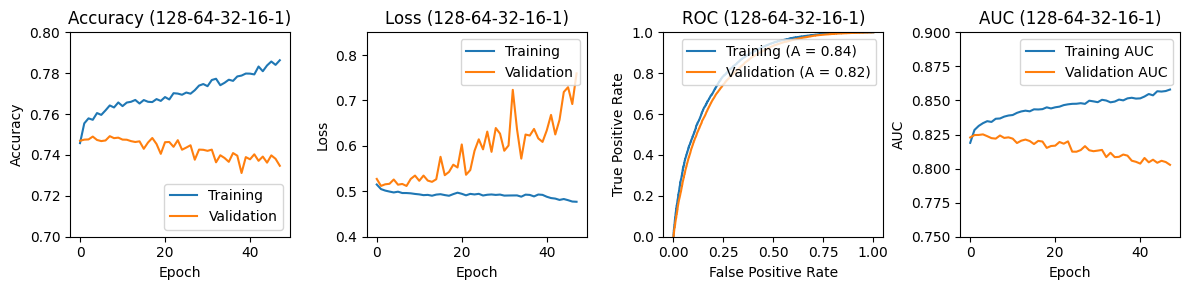

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (128-64-32-16-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.8])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (128-64-32-16-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.4, 0.85])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (128-64-32-16-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='upper right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (128-64-32-16-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.75, 0.9])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##5.) Run **(64-32-16-1)** architecture neural network

####**5.1: Create the model**

In [ ]:
model_number = 3

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number]  = model.count_params()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)                    │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

####**5.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1323/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - auc: 0.7982 - loss: 0.5375 - recall: 0.7632
Epoch 1: val_loss improved from inf to 0.52000, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7259 - auc: 0.7983 - loss: 0.5375 - recall: 0.7633 - val_accuracy: 0.7472 - val_auc: 0.8225 - val_loss: 0.5200 - val_recall: 0.8100
Epoch 2/200
1322/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - auc: 0.8321 - loss: 0.4999 - recall: 0.8130
Epoch 2: val_loss improved from 0.52000 to 0.51253, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7548 - auc: 0.8321 - loss: 0.4999 - recall: 0.8130 - val_accuracy: 0.7486 - val_auc: 0.8244 - val_loss: 0.5125 - val_recall: 0.7897
Epoch 3/200
1317/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - auc: 0.8277 - loss: 0.5067 - recall: 0.8129
Epoch 3: val_loss improved from 0.51253 to 0.51202, saving model to my_best_mod

####**5.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - auc: 0.8340 - loss: 0.4965 - recall: 0.8446
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7504 - auc: 0.8268 - loss: 0.5097 - recall: 0.8370


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	75.69% 		74.81%
Loss: 		0.4920		0.5120
Recall: 	0.8484 		0.8370
F1-score: 	0.7766 		0.7689
ROC score: 	0.838571 	0.824800
AUC score: 	0.838595 	0.824783

Predictions: [[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]]
Number of epochs ran:	 43


####**5.4: Visualize the model's results**

<ipython-input-271-f9146ed854a5>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-271-f9146ed854a5>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


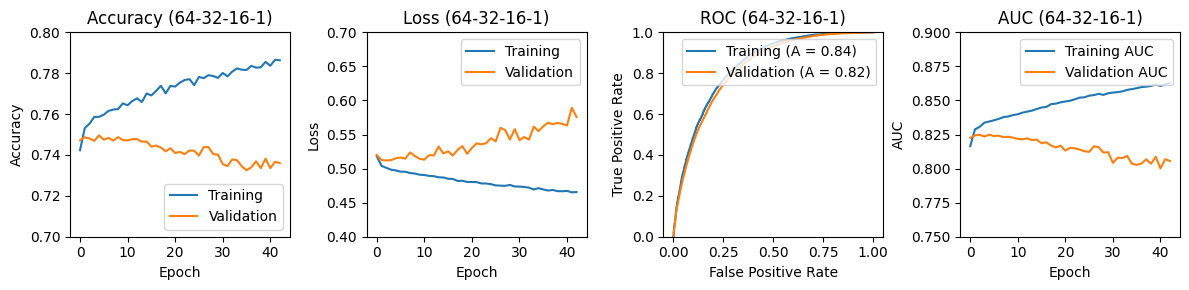

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (64-32-16-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.8])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (64-32-16-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.4, 0.7])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (64-32-16-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='upper right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (64-32-16-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.75, 0.9])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##6.) Run **(16-8-4-1)** architecture neural network

####**6.1: Create the model**

In [ ]:
model_number = 4

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number]  = model.count_params()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_170 (Dense)                    │ (None, 16)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

####**6.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1296/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.7394 - loss: 0.5933 - recall: 0.6584
Epoch 1: val_loss improved from inf to 0.51707, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6855 - auc: 0.7407 - loss: 0.5922 - recall: 0.6608 - val_accuracy: 0.7456 - val_auc: 0.8189 - val_loss: 0.5171 - val_recall: 0.8083
Epoch 2/200
1325/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - auc: 0.8258 - loss: 0.5061 - recall: 0.8088
Epoch 2: val_loss improved from 0.51707 to 0.51365, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7482 - auc: 0.8258 - loss: 0.5061 - recall: 0.8088 - val_accuracy: 0.7467 - val_auc: 0.8213 - val_loss: 0.5137 - val_recall: 0.8201
Epoch 3/200
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7564 - auc: 0.8316 - loss: 0.4994 - recall: 0.8211
Epoch 3: val_loss improved from 0.51365 to 0.51324, saving model to my_best_mod

####**6.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7607 - auc: 0.8349 - loss: 0.4940 - recall: 0.8202
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7513 - auc: 0.8272 - loss: 0.5068 - recall: 0.8079


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	76.23% 		75.03%
Loss: 		0.4912		0.5090
Recall: 	0.8241 		0.8094
F1-score: 	0.7754 		0.7645
ROC score: 	0.838170 	0.825391
AUC score: 	0.838147 	0.825385

Predictions: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 54


####**6.4: Visualize the model's results**

<ipython-input-279-e9ee105493e5>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-279-e9ee105493e5>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


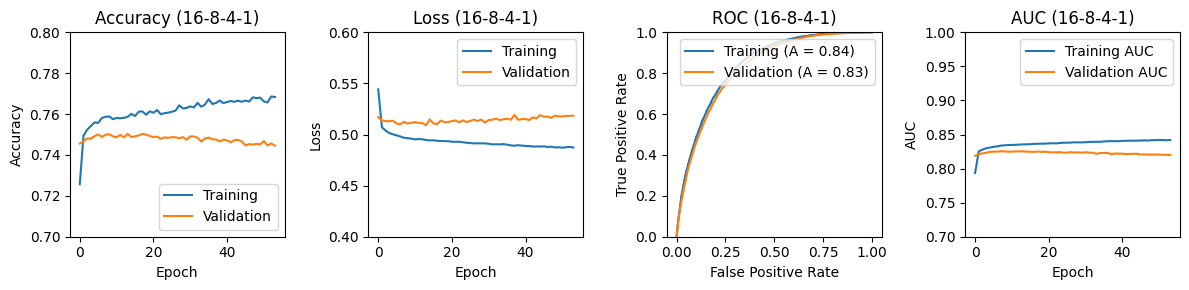

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (16-8-4-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.8])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (16-8-4-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.4, 0.6])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (16-8-4-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='upper right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (16-8-4-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.7, 1])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##7.) Run **(8-4-1)** architecture neural network

####**7.1: Create the model**

In [ ]:
model_number = 5

model = Sequential()

model.add(Dense(8, activation= 'relu', input_shape=(X.shape[1],)))
model.add(Dense(4, activation= 'relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number]  = model.count_params()

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_187 (Dense)                    │ (None, 8)                   │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

####**7.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1308/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6809 - auc: 0.7435 - loss: 0.5947 - recall: 0.6441
Epoch 1: val_loss improved from inf to 0.52024, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6814 - auc: 0.7441 - loss: 0.5941 - recall: 0.6454 - val_accuracy: 0.7429 - val_auc: 0.8168 - val_loss: 0.5202 - val_recall: 0.7904
Epoch 2/200
1318/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7499 - auc: 0.8242 - loss: 0.5089 - recall: 0.8009
Epoch 2: val_loss improved from 0.52024 to 0.51344, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7499 - auc: 0.8242 - loss: 0.5089 - recall: 0.8010 - val_accuracy: 0.7452 - val_auc: 0.8221 - val_loss: 0.5134 - val_recall: 0.8036
Epoch 3/200
1313/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7538 - auc: 0.8291 - loss: 0.5034 - recall: 0.8111
Epoch 3: val_loss improved from 0.51344 to 0.51246, saving model to my_best_

####**7.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7552 - auc: 0.8291 - loss: 0.5007 - recall: 0.8140
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7520 - auc: 0.8276 - loss: 0.5073 - recall: 0.8083


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	75.90% 		75.03%
Loss: 		0.4963		0.5097
Recall: 	0.8222 		0.8092
F1-score: 	0.7726 		0.7645
ROC score: 	0.834191 	0.825503
AUC score: 	0.834160 	0.825492

Predictions: [[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 57


####**7.4: Visualize the model's results**

<ipython-input-355-f7e3fe459610>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-355-f7e3fe459610>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


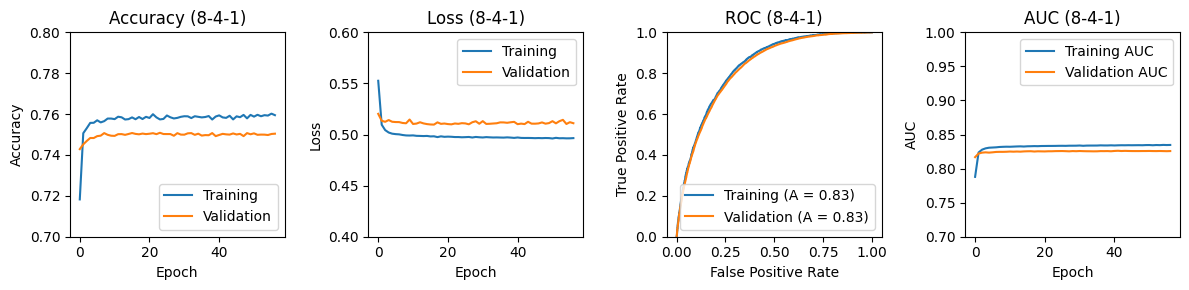

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (8-4-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.80])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (8-4-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.4, 0.6])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (8-4-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='lower right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (8-4-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.7, 1])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##8.) Run **(4-1)** architecture neural network

####**8.1: Create the model**

In [ ]:
model_number = 6
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number] = model.count_params()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)                    │ (None, 4)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

####**8.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1325/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5737 - auc: 0.6284 - loss: 0.6849 - recall: 0.6141
Epoch 1: val_loss improved from inf to 0.52651, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5738 - auc: 0.6286 - loss: 0.6848 - recall: 0.6142 - val_accuracy: 0.7386 - val_auc: 0.8131 - val_loss: 0.5265 - val_recall: 0.7518
Epoch 2/200
1302/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - auc: 0.8259 - loss: 0.5078 - recall: 0.7874
Epoch 2: val_loss improved from 0.52651 to 0.51638, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7511 - auc: 0.8259 - loss: 0.5079 - recall: 0.7875 - val_accuracy: 0.7444 - val_auc: 0.8196 - val_loss: 0.5164 - val_recall: 0.7949
Epoch 3/200
1323/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7514 - auc: 0.8248 - loss: 0.5070 - recall: 0.8075
Epoch 3: val_loss improved from 0.51638 to 0.51468, saving model to my_best_mod

####**8.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7544 - auc: 0.8278 - loss: 0.5027 - recall: 0.8132
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7526 - auc: 0.8277 - loss: 0.5073 - recall: 0.8101


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	75.81% 		75.09%
Loss: 		0.4987		0.5101
Recall: 	0.8201 		0.8106
F1-score: 	0.7715 		0.7652
ROC score: 	0.832181 	0.825351
AUC score: 	0.832166 	0.825350

Predictions: [[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 95


####**8.4: Visualize the model's results**

<ipython-input-309-9b4e52e79e82>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-309-9b4e52e79e82>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


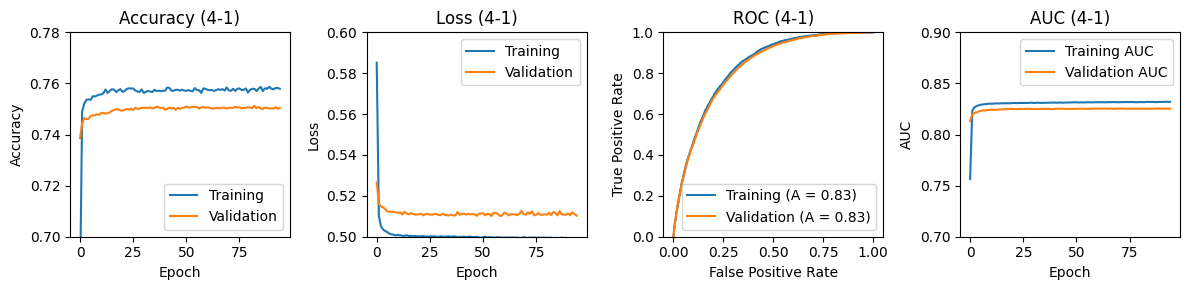

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (4-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.78])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (4-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.5, 0.6])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (4-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='lower right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (4-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.7, 0.9])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##9.) Run **(2-1)** architecture neural network

####**9.1: Create the model**

In [ ]:
model_number = 7

model = Sequential()

model.add(Dense(2, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

# Used to create tabular data.
parameter_counts[model_number]  = model.count_params()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_184 (Dense)                    │ (None, 2)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

####**9.2: Compile and run the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy', 'recall', 'auc'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=1)

start_time = time.time()

history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b])

end_time = time.time()
print_runtime(start_time, end_time)

Epoch 1/200
1321/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.7044 - loss: 0.6487 - recall: 0.6555
Epoch 1: val_loss improved from inf to 0.58401, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6611 - auc: 0.7046 - loss: 0.6486 - recall: 0.6555 - val_accuracy: 0.7274 - val_auc: 0.7852 - val_loss: 0.5840 - val_recall: 0.6881
Epoch 2/200
1325/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - auc: 0.7958 - loss: 0.5702 - recall: 0.6947
Epoch 2: val_loss improved from 0.58401 to 0.55356, saving model to my_best_model.weights.h5
1326/1326 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7361 - auc: 0.7958 - loss: 0.5702 - recall: 0.6948 - val_accuracy: 0.7375 - val_auc: 0.8052 - val_loss: 0.5536 - val_recall: 0.7059
Epoch 3/200
1307/1326 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - auc: 0.8163 - loss: 0.5421 - recall: 0.7179
Epoch 3: val_loss improved from 0.55356 to 0.54194, saving model to my_best_mode

####**9.3: Evaluate the model**

In [ ]:
# For storing the best weight configurations.
model.load_weights('my_best_model.weights.h5')

In [ ]:
# For loss and AUC scores.
train_scores = model.evaluate(X_training, Y_training)
val_scores = model.evaluate(X_validation, Y_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7449 - auc: 0.8204 - loss: 0.5192 - recall: 0.7584
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7471 - auc: 0.8228 - loss: 0.5170 - recall: 0.7600


In [ ]:
# For accuracy, recall, F1, and ROC scores.
prediction_train= model.predict(X_training)
prediction_val = model.predict(X_validation)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
# For training and validation accuracy.
training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
train_acc = training_accuracies[model_number]
val_acc = validation_accuracies[model_number]

# For training and validation loss.
training_losses[model_number] = train_scores[0]
validation_losses[model_number] = val_scores[0]
train_loss = training_losses[model_number]
val_loss = validation_losses[model_number]

# For training and validation recall.
training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
train_recall = training_recalls[model_number]
val_recall = validation_recalls[model_number]

# For training and validation F1-score.
training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
train_f1_score = training_f1_scores[model_number]
val_f1_score = validation_f1_scores[model_number]

# For training and validation ROC score.
train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
training_roc_scores[model_number] = auc(train_fpr, train_tpr)
train_roc = training_roc_scores[model_number]

val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
val_roc = validation_roc_scores[model_number]

# For training and validation AUC score.
training_auc_scores[model_number] = train_scores[3]
validation_auc_scores[model_number] = val_scores[3]
train_auc = training_auc_scores[model_number]
val_auc = validation_auc_scores[model_number]

# For epoch count.
epoch_counts[model_number] = len(history.history['loss'])
epochs = epoch_counts[model_number]

print("\t\tTraining\tValidation")
print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

print("\nPredictions:", prediction_val[0:10].T.round())
print("Number of epochs ran:\t", epochs.item())

		Training	Validation
Accuracy: 	75.12% 		74.58%
Loss: 		0.5122		0.5188
Recall: 	0.7678 		0.7608
F1-score: 	0.7546 		0.7498
ROC score: 	0.825514 	0.821164
AUC score: 	0.825573 	0.821269

Predictions: [[0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 132


####**9.4: Visualize the model's results**

<ipython-input-325-9f5c32cf58a7>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
<ipython-input-325-9f5c32cf58a7>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)


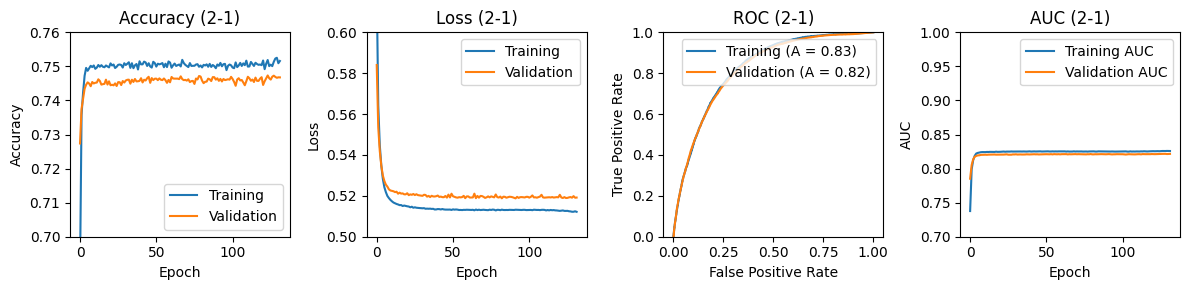

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(history.history['accuracy'], label='Training')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title("Accuracy (2-1)")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 0.76])
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Training')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title("Loss (2-1)")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.5, 0.6])
axes[1].legend(loc='upper right')

axes[2].plot(train_fpr, train_tpr, label='Training (A = %0.2f)' % train_roc)
axes[2].plot(val_fpr, val_tpr, label='Validation (A = %0.2f)' % val_roc)
axes[2].set_title("ROC (2-1)")
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_ylim([0, 1])
axes[2].legend(loc='upper right')

axes[3].plot(history.history['auc'], label='Training AUC')
axes[3].plot(history.history['val_auc'], label='Validation AUC')
axes[3].set_title("AUC (2-1)")
axes[3].set_xlabel('Epoch')
axes[3].set_ylabel('AUC')
axes[3].set_ylim([0.7, 1])
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()

##10.) Aggregately visualize all results

###**10.1: Results for accuracy and loss**

In [ ]:
models = np.array(["Random baseline accuracy",
                   "Simple logistic regression",
                   "(128, 64, 32, 16, 1)",
                   "(64, 32, 16, 1)",
                   "(16, 8, 4, 1)",
                   "(8, 4, 1)",
                   "(4, 1)",
                   "(2, 1)"])
df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_accuracy = pd.DataFrame(training_accuracies, columns=['Training Accuracy'])
df_val_accuracy = pd.DataFrame(validation_accuracies, columns=['Validation Accuracy'])
df_train_loss = pd.DataFrame(training_losses, columns=['Training Loss'])
df_val_loss = pd.DataFrame(validation_losses, columns=['Validation Loss'])

combined_df = pd.concat([df_models,
                         df_train_accuracy,
                         df_val_accuracy,
                         df_train_loss,
                         df_val_loss], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
Model Type,,,,
Random baseline accuracy,50.000000,50.000000,0.000000,0.000000
Simple logistic regression,75.107276,74.636759,0.508748,0.514906
"(128, 64, 32, 16, 1)",76.738813,74.919673,0.484438,0.511778
"(64, 32, 16, 1)",75.687273,74.806507,0.492042,0.512016
"(16, 8, 4, 1)",76.229547,75.028797,0.491184,0.509038
"(8, 4, 1)",75.899467,75.030817,0.496260,0.509715
"(4, 1)",75.809874,75.089421,0.498650,0.510120
"(2, 1)",75.121422,74.576134,0.512188,0.518767


###**10.2: Results for recall and F1-scores**

In [ ]:
models = np.array(["Random baseline accuracy",
                   "Simple logistic regression",
                   "(128, 64, 32, 16, 1)",
                   "(64, 32, 16, 1)",
                   "(16, 8, 4, 1)",
                   "(8, 4, 1)",
                   "(4, 1)",
                   "(2, 1)"])
df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_recall = pd.DataFrame(training_recalls, columns=['Training Recall'])
df_val_recall = pd.DataFrame(validation_recalls, columns=['Validation Recall'])
df_train_f1 = pd.DataFrame(training_f1_scores, columns=['Training F1-score'])
df_val_f1 = pd.DataFrame(validation_f1_scores, columns=['Validation F1-score'])


combined_df = pd.concat([df_models,
                         df_train_recall,
                         df_val_recall,
                         df_train_f1,
                         df_val_f1,], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Recall,Validation Recall,Training F1-score,Validation F1-score
Model Type,,,,
Random baseline accuracy,0.000000,0.000000,0.000000,0.000000
Simple logistic regression,0.772676,0.765534,0.755613,0.751451
"(128, 64, 32, 16, 1)",0.801931,0.780221,0.774471,0.757052
"(64, 32, 16, 1)",0.848419,0.836992,0.776584,0.768937
"(16, 8, 4, 1)",0.824086,0.809393,0.775447,0.764525
"(8, 4, 1)",0.822193,0.809232,0.772632,0.764504
"(4, 1)",0.820110,0.810604,0.771533,0.765231
"(2, 1)",0.767847,0.760813,0.754559,0.749846


###**10.3: Results for ROC and AUC score**

In [ ]:
models = np.array(["Random baseline accuracy",
                   "Simple logistic regression",
                   "(128, 64, 32, 16, 1)",
                   "(64, 32, 16, 1)",
                   "(16, 8, 4, 1)",
                   "(8, 4, 1)",
                   "(4, 1)",
                   "(2, 1)"])
df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_roc = pd.DataFrame(training_roc_scores, columns=['Training ROC score'])
df_val_roc = pd.DataFrame(validation_roc_scores, columns=['Validation ROC score'])
df_train_auc = pd.DataFrame(training_auc_scores, columns=['Training AUC score'])
df_val_auc = pd.DataFrame(validation_auc_scores, columns=['Validation AUC score'])


combined_df = pd.concat([df_models,
                         df_train_roc,
                         df_val_roc,
                         df_train_auc,
                         df_val_auc], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training ROC score,Validation ROC score,Training AUC score,Validation AUC score
Model Type,,,,
Random baseline accuracy,0.000000,0.000000,0.000000,0.000000
Simple logistic regression,0.826870,0.823051,0.826881,0.823048
"(128, 64, 32, 16, 1)",0.844410,0.824308,0.844418,0.824284
"(64, 32, 16, 1)",0.838571,0.824800,0.838595,0.824783
"(16, 8, 4, 1)",0.838170,0.825391,0.838147,0.825385
"(8, 4, 1)",0.834191,0.825503,0.834160,0.825492
"(4, 1)",0.832181,0.825351,0.832166,0.825350
"(2, 1)",0.825514,0.821164,0.825573,0.821269


###**10.4 Results for parameter and epoch count**

In [ ]:
models = np.array(["Random baseline accuracy",
                   "Simple logistic regression",
                   "(128, 64, 32, 16, 1)",
                   "(64, 32, 16, 1)",
                   "(16, 8, 4, 1)",
                   "(8, 4, 1)",
                   "(4, 1)",
                   "(2, 1)"])
df_models = pd.DataFrame(models, columns=['Model Type'])

df_parameters = pd.DataFrame(parameter_counts, columns=['Total # of Parameters'])
df_epochs = pd.DataFrame(epoch_counts, columns=['Total # of Epochs'])

combined_df = pd.concat([df_models,
                         df_parameters,
                         df_epochs], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Total # of Parameters,Total # of Epochs
Model Type,,
Random baseline accuracy,0,0
Simple logistic regression,22,42
"(128, 64, 32, 16, 1)",13697,48
"(64, 32, 16, 1)",4033,43
"(16, 8, 4, 1)",529,54
"(8, 4, 1)",217,57
"(4, 1)",93,95
"(2, 1)",47,132


##11.) Determine the best model

The neural network model with the **(8-4-1)** architecture would be the best model through this phase of the project.

This model contains a validation accuracy of **75.031%** and a validation loss of **0.510**. Although different models may have better accuracy and loss values, this model appeared to generalize the data the most properly. In other words, many of the models either underfitted or overfitted; this model did not seem to behave in that manner like the other models.

It is also worth noting that the recall (**0.809**) and F1-scores (**0.765**) may not be the highest for the **(8-4-1)** architecture model, but the ROC and AUC scores are the highest at **0.826** and **0.825** respectively. Due to the above average scores and the relative lack of underfitting and overfitting, this particular model architecture served as the ideal choice.


# Phase 4: Feature importance and reduction

##1.) Utilize a model on individual data features

###**1.1: Initialize NumPy arrays for metric storage**

In [ ]:
# There are a total of 21 features in the dataset.
num_models = len(column_list)

# These NumPy arrays will store all the metrics to create tables.
training_accuracies = np.zeros((num_models, 1), dtype=float)
validation_accuracies = np.zeros((num_models, 1), dtype=float)

# These are the accuracies for the Random Baseline Classifier. They will be placed in a table
training_accuracies[0] = 50.0
validation_accuracies[0] = 50.0

# All these metrics below will be stored in arrays to use for data visualization.
training_losses = np.zeros((num_models, 1), dtype=float)
validation_losses = np.zeros((num_models, 1), dtype=float)

training_recalls = np.zeros((num_models, 1), dtype=float)
validation_recalls = np.zeros((num_models, 1), dtype=float)

training_f1_scores = np.zeros((num_models, 1), dtype=float)
validation_f1_scores = np.zeros((num_models, 1), dtype=float)

training_roc_scores = np.zeros((num_models, 1), dtype=float)
validation_roc_scores = np.zeros((num_models, 1), dtype=float)

training_auc_scores = np.zeros((num_models, 1), dtype=float)
validation_auc_scores = np.zeros((num_models, 1), dtype=float)

parameter_counts = np.zeros((num_models, 1), dtype=int)
epoch_counts = np.zeros((num_models, 1), dtype=int)

###**1.2: Declare a function for preprocessing data**

In [ ]:
def select_features_and_split_data(dataset, norm_dataset, column_list, feature_index):
  # Select one feature at a time.
  X = norm_dataset.iloc[:, i]

  # Select the target variable each time.
  Y = dataset.iloc[:, 0]

  # Combine normalized features and target.
  data_final = pd.concat([Y, X], axis=1)

  # Shuffle the samples/data rows.
  data_final = data_final.sample(frac=1).reset_index(drop=True)

  # Split data into training and validation sets.
  data_30_percent = int(0.3 * len(data_final))
  X_training = data_final.iloc[:data_30_percent, 1:]            # 70% training
  Y_training = data_final.iloc[:data_30_percent, 0]
  X_validation = data_final.iloc[data_30_percent:, 1:]          # 30% validation
  Y_validation = data_final.iloc[data_30_percent:, 0]

  return X_training, Y_training, X_validation, Y_validation

###**1.3: Declare a function for storing and printing model metrics**

In [ ]:
def store_and_print_metrics():
   # For training and validation accuracy.
  training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
  validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
  train_acc = training_accuracies[model_number]
  val_acc = validation_accuracies[model_number]

  # For training and validation loss.
  training_losses[model_number] = train_scores[0]
  validation_losses[model_number] = val_scores[0]
  train_loss = training_losses[model_number]
  val_loss = validation_losses[model_number]

  # For training and validation recall.
  training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
  validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
  train_recall = training_recalls[model_number]
  val_recall = validation_recalls[model_number]

  # For training and validation F1-score.
  training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
  validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
  train_f1_score = training_f1_scores[model_number]
  val_f1_score = validation_f1_scores[model_number]

  # For training and validation ROC score.
  train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
  training_roc_scores[model_number] = auc(train_fpr, train_tpr)
  train_roc = training_roc_scores[model_number]

  val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
  validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
  val_roc = validation_roc_scores[model_number]

  # For training and validation AUC score.
  training_auc_scores[model_number] = train_scores[3]
  validation_auc_scores[model_number] = val_scores[3]
  train_auc = training_auc_scores[model_number]
  val_auc = validation_auc_scores[model_number]

  # For epoch count.
  epoch_counts[model_number] = len(history.history['loss'])
  epochs = epoch_counts[model_number]

  print("\t\tTraining\tValidation")
  print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
  print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
  print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
  print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
  print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
  print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

  print("\nPredictions:", prediction_val[0:10].T.round())
  print("Number of epochs ran:\t", epochs.item())
  print("\n")

###**1.4: Iteratively run multiple models with only *one* feature at a time**

In [ ]:
target = column_list[0]
start_time = time.time()

for i in range(1, len(column_list)):
  model_number = i

  X_training, Y_training, X_validation, Y_validation = select_features_and_split_data(dataset, norm_dataset, column_list, i)

  print(f"**********************************************{i}: {column_list[i]}**********************************************")


  # Create the model with the best architecture, as determined in Phase 3.
  model = Sequential()

  model.add(Dense(8, activation='relu', input_dim=1))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))


  # Compile the model, making sure to use model checkpointing and early stopping.
  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'recall', 'auc'])

  callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5',
                               monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)


  # Run the model.
  history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200, batch_size=16, callbacks = [callback_a, callback_b], verbose=0)


  # Load the most optimal weights prior to model evaluation.
  model.load_weights('my_best_model.weights.h5')


  # Perform model evaluation.
  train_scores = model.evaluate(X_training, Y_training)
  val_scores = model.evaluate(X_validation, Y_validation)


  # Print predictions from the model.
  prediction_train = model.predict(X_training)
  prediction_val = model.predict(X_validation)


  # Store metrics into DataFrames for bar chart and tabular visualization.
  store_and_print_metrics()


end_time = time.time()
print_runtime(start_time, end_time)

**********************************************1: High Blood Pressure (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6877 - auc: 0.6878 - loss: 0.6193 - recall: 0.7560
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6899 - auc: 0.6895 - loss: 0.6182 - recall: 0.7538
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	68.64% 		69.04%
Loss: 		0.6202		0.6176
Recall: 	0.7532 		0.7525
F1-score: 	0.7047 		0.7091
ROC score: 	0.686787 	0.690267
AUC score: 	0.686787 	0.690267

Predictions: [[1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]]
Number of epochs ran:	 59


**********************************************2: High Cholesterol (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6415 - auc: 0.6414 - loss: 0.6525 - recall: 0.6694
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6497 - auc: 0.6497 - loss: 0.6476 - recall: 0.6724
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
		Training	Validation
Accuracy: 	64.61% 		64.37%
Loss: 		0.6497		0.6512
Recall: 	0.6712 		0.6697
F1-score: 	0.6541 		0.6530
ROC score: 	0.646162 	0.643696
AUC score: 	0.646184 	0.643656

Predictions: [[1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]]
Number of epochs ran:	 96


**********************************************3: Cholesterol Checked (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5190 - auc: 0.5191 - loss: 0.6850 - recall: 0.9933
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5237 - auc: 0.5184 - loss: 0.6851 - recall: 0.9941
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	51.38% 		51.97%
Loss: 		0.6857		0.6858
Recall: 	0.9924 		0.9935
F1-score: 	0.6690 		0.6750
ROC score: 	0.518367 	0.517662
AUC score: 	0.518507 	0.517664

Predictions: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Number of epochs ran:	 84


**********************************************4: BMI**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6416 - auc: 0.6930 - loss: 0.6345 - recall: 0.6465
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6422 - auc: 0.6912 - loss: 0.6361 - recall: 0.6486
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
		Training	Validation
Accuracy: 	63.93% 		64.06%
Loss: 		0.6364		0.6366
Recall: 	0.6438 		0.6451
F1-score: 	0.6405 		0.6424
ROC score: 	0.689576 	0.690030
AUC score: 	0.689598 	0.690035

Predictions: [[1. 0. 0. 1. 0. 1. 0. 0. 1. 1.]]
Number of epochs ran:	 200


**********************************************5: Smoke (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5387 - auc: 0.5387 - loss: 0.6902 - recall: 0.5183
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5469 - auc: 0.5468 - loss: 0.6888 - recall: 0.5201
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	53.98% 		54.43%
Loss: 		0.6900		0.6892
Recall: 	0.5194 		0.5177
F1-score: 	0.5303 		0.5318
ROC score: 	0.539794 	0.544303
AUC score: 	0.539823 	0.544286

Predictions: [[0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]]
Number of epochs ran:	 71


**********************************************6: Stroke (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5285 - auc: 0.5294 - loss: 0.6854 - recall: 0.0900
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5332 - auc: 0.5314 - loss: 0.6845 - recall: 0.0946
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	52.49% 		53.26%
Loss: 		0.6853		0.6850
Recall: 	0.0909 		0.0931
F1-score: 	0.1622 		0.1655
ROC score: 	0.530032 	0.530474
AUC score: 	0.529994 	0.530421

Predictions: [[1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]]
Number of epochs ran:	 55


**********************************************7: Heart Attack (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5766 - auc: 0.5758 - loss: 0.6691 - recall: 0.2212
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5737 - auc: 0.5746 - loss: 0.6703 - recall: 0.2235
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	57.54% 		57.49%
Loss: 		0.6701		0.6698
Recall: 	0.2202 		0.2240
F1-score: 	0.3408 		0.3454
ROC score: 	0.574188 	0.575409
AUC score: 	0.574291 	0.575404

Predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 67


**********************************************8: Exercise (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5771 - auc: 0.5779 - loss: 0.6788 - recall: 0.3826
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5723 - auc: 0.5719 - loss: 0.6806 - recall: 0.3654
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	57.30% 		57.23%
Loss: 		0.6804		0.6805
Recall: 	0.3729 		0.3680
F1-score: 	0.4659 		0.4626
ROC score: 	0.572849 	0.572416
AUC score: 	0.572764 	0.572386

Predictions: [[0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]]
Number of epochs ran:	 45


**********************************************9: Fruits (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5297 - auc: 0.5308 - loss: 0.6913 - recall: 0.4219
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5230 - auc: 0.5224 - loss: 0.6921 - recall: 0.4097
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
		Training	Validation
Accuracy: 	53.02% 		52.47%
Loss: 		0.6913		0.6919
Recall: 	0.4161 		0.4139
F1-score: 	0.4714 		0.4647
ROC score: 	0.530977 	0.524385
AUC score: 	0.530977 	0.524385

Predictions: [[0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]]
Number of epochs ran:	 65


**********************************************10: Veggies (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5299 - auc: 0.5337 - loss: 0.6897 - recall: 0.2449
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5346 - auc: 0.5346 - loss: 0.6896 - recall: 0.2461
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	52.91% 		53.38%
Loss: 		0.6904		0.6898
Recall: 	0.2395 		0.2453
F1-score: 	0.3380 		0.3444
ROC score: 	0.530181 	0.533322
AUC score: 	0.530173 	0.533310

Predictions: [[0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]]
Number of epochs ran:	 93


**********************************************11: Heavy Alcohol Consumption (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5235 - auc: 0.5211 - loss: 0.6876 - recall: 0.9778
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5210 - auc: 0.5174 - loss: 0.6893 - recall: 0.9752
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
		Training	Validation
Accuracy: 	51.76% 		51.99%
Loss: 		0.6885		0.6885
Recall: 	0.9774 		0.9761
F1-score: 	0.6689 		0.6706
ROC score: 	0.519017 	0.519254
AUC score: 	0.519017 	0.519254

Predictions: [[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Number of epochs ran:	 90


**********************************************12: Health Coverage (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5075 - auc: 0.5081 - loss: 0.6926 - recall: 0.9571
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5053 - auc: 0.5051 - loss: 0.6928 - recall: 0.9612
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	50.58% 		50.44%
Loss: 		0.6929		0.6929
Recall: 	0.9577 		0.9607
F1-score: 	0.6601 		0.6595
ROC score: 	0.504820 	0.504788
AUC score: 	0.504820 	0.504808

Predictions: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Number of epochs ran:	 54


**********************************************13: Cost Prevents Doctor Visit (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5189 - auc: 0.5106 - loss: 0.6925 - recall: 0.1019
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5165 - auc: 0.5134 - loss: 0.6921 - recall: 0.1083
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	51.08% 		51.25%
Loss: 		0.6924		0.6923
Recall: 	0.1052 		0.1062
F1-score: 	0.1772 		0.1787
ROC score: 	0.511530 	0.512174
AUC score: 	0.511484 	0.512155

Predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 67


**********************************************14: General Health (1-5)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6822 - auc: 0.7306 - loss: 0.6014 - recall: 0.7828
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6884 - auc: 0.7324 - loss: 0.5987 - recall: 0.7934
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	68.34% 		68.64%
Loss: 		0.6021		0.5999
Recall: 	0.7819 		0.7894
F1-score: 	0.7092 		0.7167
ROC score: 	0.729637 	0.731477
AUC score: 	0.729629 	0.731492

Predictions: [[1. 0. 0. 0. 0. 1. 1. 0. 1. 1.]]
Number of epochs ran:	 155


**********************************************15: Days Poor Mental Health**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5357 - auc: 0.5342 - loss: 0.6897 - recall: 0.2340
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5288 - auc: 0.5325 - loss: 0.6892 - recall: 0.2306
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	53.53% 		52.70%
Loss: 		0.6889		0.6893
Recall: 	0.2345 		0.2313
F1-score: 	0.3336 		0.3292
ROC score: 	0.531737 	0.525011
AUC score: 	0.535478 	0.531185

Predictions: [[0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]]
Number of epochs ran:	 110


**********************************************16: Days Poor Physical Health**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5982 - auc: 0.6115 - loss: 0.6672 - recall: 0.4341
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6016 - auc: 0.6163 - loss: 0.6658 - recall: 0.4403
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	59.73% 		59.89%
Loss: 		0.6684		0.6665
Recall: 	0.4326 		0.4366
F1-score: 	0.5160 		0.5220
ROC score: 	0.608427 	0.614240
AUC score: 	0.608526 	0.614257

Predictions: [[0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]]
Number of epochs ran:	 85


**********************************************17: Stairs Difficulty (y/n)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6107 - auc: 0.6171 - loss: 0.6553 - recall: 0.3634
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6177 - auc: 0.6177 - loss: 0.6556 - recall: 0.3725
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
		Training	Validation
Accuracy: 	61.64% 		61.94%
Loss: 		0.6536		0.6554
Recall: 	0.3708 		0.3714
F1-score: 	0.4953 		0.4922
ROC score: 	0.620214 	0.617744
AUC score: 	0.620223 	0.617761

Predictions: [[0. 1. 1. 1. 0. 0. 0. 1. 1. 0.]]
Number of epochs ran:	 71


**********************************************18: Sex (M/F)**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5200 - auc: 0.5201 - loss: 0.6923 - recall: 0.4739
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5224 - auc: 0.5223 - loss: 0.6921 - recall: 0.4820
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	52.15% 		52.24%
Loss: 		0.6922		0.6921
Recall: 	0.4747 		0.4810
F1-score: 	0.4989 		0.5014
ROC score: 	0.521600 	0.522316
AUC score: 	0.521649 	0.522336

Predictions: [[1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]]
Number of epochs ran:	 112


**********************************************19: Age**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6194 - auc: 0.6544 - loss: 0.6442 - recall: 0.8006
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6164 - auc: 0.6553 - loss: 0.6464 - recall: 0.8013
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	61.70% 		61.52%
Loss: 		0.6458		0.6467
Recall: 	0.8014 		0.8006
F1-score: 	0.6766 		0.6754
ROC score: 	0.654316 	0.653261
AUC score: 	0.654385 	0.653269

Predictions: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]
Number of epochs ran:	 126


**********************************************20: Education**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5751 - auc: 0.6025 - loss: 0.6754 - recall: 0.7143
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5711 - auc: 0.5887 - loss: 0.6796 - recall: 0.7032
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	57.48% 		57.34%
Loss: 		0.6766		0.6786
Recall: 	0.7119 		0.7032
F1-score: 	0.6227 		0.6239
ROC score: 	0.598816 	0.591095
AUC score: 	0.598857 	0.591101

Predictions: [[0. 1. 1. 1. 0. 0. 0. 1. 1. 0.]]
Number of epochs ran:	 45


**********************************************21: Income**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6044 - auc: 0.6348 - loss: 0.6642 - recall: 0.6536
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6016 - auc: 0.6341 - loss: 0.6648 - recall: 0.6444
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	60.22% 		60.07%
Loss: 		0.6657		0.6656
Recall: 	0.6544 		0.6445
F1-score: 	0.6203 		0.6182
ROC score: 	0.631510 	0.632290
AUC score: 	0.631481 	0.632285

Predictions: [[0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]]
Number of epochs ran:	 111



Elapsed time: 4 hours, 6 minutes, 33 seconds


###**1.5: Visualize data for metrics from single-feature models**

####**1.5.1: Tabular results for accuracy, loss, and number of epochs**

In [ ]:
training_accuracies[0] = 50.0
validation_accuracies[0] = 50.0

column_list[0] = '*****Random Baseline Accuracy*****'
models = np.array(column_list)

df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_accuracy = pd.DataFrame(training_accuracies, columns=['Training Accuracy'])
df_val_accuracy = pd.DataFrame(validation_accuracies, columns=['Validation Accuracy'])
df_train_loss = pd.DataFrame(training_losses, columns=['Training Loss'])
df_val_loss = pd.DataFrame(validation_losses, columns=['Validation Loss'])
df_epochs = pd.DataFrame(epoch_counts, columns=['Total # of Epochs'])


combined_df = pd.concat([df_models,
                         df_train_accuracy,
                         df_val_accuracy,
                         df_train_loss,
                         df_val_loss,
                         df_epochs], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss,Total # of Epochs
Model Type,,,,,
*****Random Baseline Accuracy*****,50.000000,50.000000,0.000000,0.000000,0
High Blood Pressure (y/n),68.637714,69.043144,0.620190,0.617615,59
High Cholesterol (y/n),64.610742,64.369001,0.649670,0.651164,96
Cholesterol Checked (y/n),51.379262,51.969284,0.685745,0.685759,84
BMI,63.931721,64.061837,0.636416,0.636602,200
Smoke (y/n),53.982176,54.428615,0.690008,0.689211,71
Stroke (y/n),52.492102,53.258563,0.685259,0.684980,55
Heart Attack (y/n),57.537606,57.494190,0.670087,0.669762,67
Exercise (y/n),57.301834,57.227443,0.680448,0.680468,45


####**1.5.2: Tabular results for recall and F1-score**

In [ ]:
column_list[0] = '*****Random Baseline Accuracy*****'
models = np.array(column_list)

df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_recall = pd.DataFrame(training_recalls, columns=['Training Recall'])
df_val_recall = pd.DataFrame(validation_recalls, columns=['Validation Recall'])
df_train_f1 = pd.DataFrame(training_f1_scores, columns=['Training F1-score'])
df_val_f1 = pd.DataFrame(validation_f1_scores, columns=['Validation F1-score'])


combined_df = pd.concat([df_models,
                         df_train_recall,
                         df_val_recall,
                         df_train_f1,
                         df_val_f1,], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Recall,Validation Recall,Training F1-score,Validation F1-score
Model Type,,,,
*****Random Baseline Accuracy*****,0.000000,0.000000,0.000000,0.000000
High Blood Pressure (y/n),0.753179,0.752459,0.704728,0.709057
High Cholesterol (y/n),0.671176,0.669667,0.654068,0.653009
Cholesterol Checked (y/n),0.992380,0.993521,0.668957,0.675043
BMI,0.643829,0.645090,0.640470,0.642418
Smoke (y/n),0.519427,0.517703,0.530253,0.531836
Stroke (y/n),0.090901,0.093136,0.162162,0.165464
Heart Attack (y/n),0.220225,0.224016,0.340824,0.345429
Exercise (y/n),0.372899,0.367992,0.465876,0.462601


####**1.5.3: Tabular results for ROC and AUC score**

In [ ]:
column_list[0] = '*****Random Baseline Accuracy*****'
models = np.array(column_list)

df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_roc = pd.DataFrame(training_roc_scores, columns=['Training ROC score'])
df_val_roc = pd.DataFrame(validation_roc_scores, columns=['Validation ROC score'])
df_train_auc = pd.DataFrame(training_auc_scores, columns=['Training AUC score'])
df_val_auc = pd.DataFrame(validation_auc_scores, columns=['Validation AUC score'])


combined_df = pd.concat([df_models,
                         df_train_roc,
                         df_val_roc,
                         df_train_auc,
                         df_val_auc], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training ROC score,Validation ROC score,Training AUC score,Validation AUC score
Model Type,,,,
*****Random Baseline Accuracy*****,0.000000,0.000000,0.000000,0.000000
High Blood Pressure (y/n),0.686787,0.690267,0.686787,0.690267
High Cholesterol (y/n),0.646162,0.643696,0.646184,0.643656
Cholesterol Checked (y/n),0.518367,0.517662,0.518507,0.517664
BMI,0.689576,0.690030,0.689598,0.690035
Smoke (y/n),0.539794,0.544303,0.539823,0.544286
Stroke (y/n),0.530032,0.530474,0.529994,0.530421
Heart Attack (y/n),0.574188,0.575409,0.574291,0.575404
Exercise (y/n),0.572849,0.572416,0.572764,0.572386


####**1.5.4: Bar chart for features' validation accuracies**

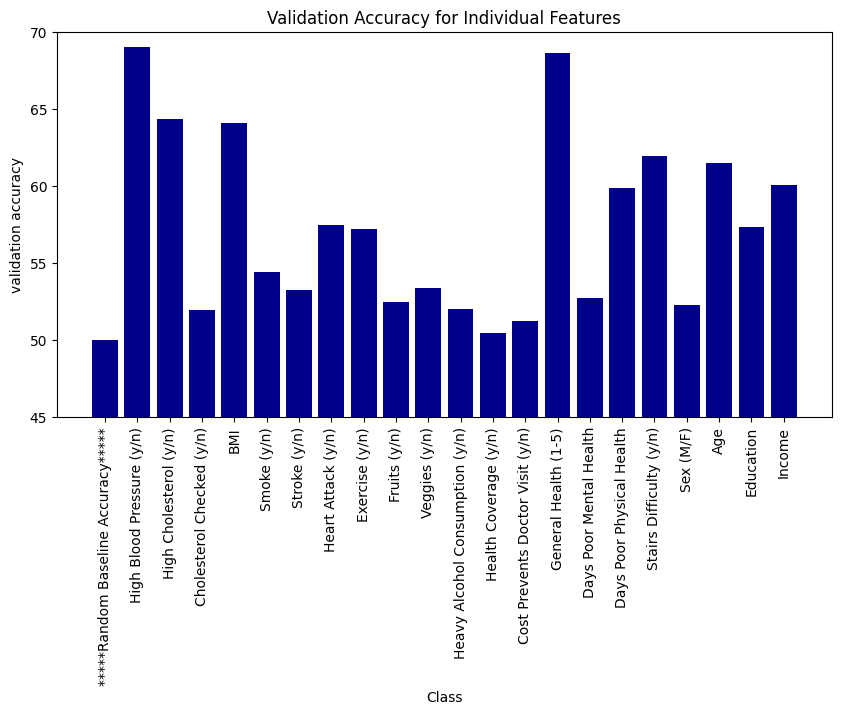

In [ ]:
fig = plt.figure(figsize = (10, 5))

df_val_accuracy = df_val_accuracy.squeeze()

plt.bar(column_list, df_val_accuracy, color="darkblue", width=0.8)

plt.xlabel("Class")
plt.xticks(rotation=90)
plt.ylim(45, 70)
plt.ylabel("validation accuracy")
plt.title("Validation Accuracy for Individual Features")

plt.show()

###**1.6: Show features that will be removed by order of validation accuracy**

In [ ]:
# Temporarily change value of random baseline classifer to prevent processing in a loop.
validation_accuracies[0] = -1

# Creates indices to concatenate to a DataFrame
index_array = np.arange(len(column_list))
index_df = pd.DataFrame(index_array)

# Groups validation accuracy metrics with features.
models_with_accuracy_df = pd.concat([index_df,
                                     df_models,
                                     df_val_accuracy], axis=1)
accuracy_array = models_with_accuracy_df.to_numpy()

# Sorts features by lowest to highest accuracy.
sorted_accuracy_array = accuracy_array[accuracy_array[:, 2].argsort()]

# Delete random baseline classifier from array.
sorted_accuracy_array = np.delete(sorted_accuracy_array, 0, 0)

# Store feature column indices from dataset.
feature_numbers = list(sorted_accuracy_array[:, 0])
print(sorted_accuracy_array)

[[12 'Health Coverage (y/n)' 50.43750631504496]
 [13 'Cost Prevents Doctor Visit (y/n)' 51.24583207032434]
 [3 'Cholesterol Checked (y/n)' 51.96928362129939]
 [11 'Heavy Alcohol Consumption (y/n)' 51.98545013640498]
 [18 'Sex (M/F)' 52.24007274931798]
 [9 'Fruits (y/n)' 52.4704455895726]
 [15 'Days Poor Mental Health' 52.69879761543902]
 [6 'Stroke (y/n)' 53.25856320096999]
 [10 'Veggies (y/n)' 53.37577043548551]
 [5 'Smoke (y/n)' 54.42861473173689]
 [8 'Exercise (y/n)' 57.227442659391734]
 [20 'Education' 57.34464989390724]
 [7 'Heart Attack (y/n)' 57.49419015863393]
 [16 'Days Poor Physical Health' 59.88885520864908]
 [21 'Income' 60.07274931797515]
 [19 'Age' 61.51561079114883]
 [17 'Stairs Difficulty (y/n)' 61.93594018389411]
 [4 'BMI' 64.06183692027886]
 [2 'High Cholesterol (y/n)' 64.36900070728504]
 [14 'General Health (1-5)' 68.63898150954834]
 [1 'High Blood Pressure (y/n)' 69.04314438718804]]


###**1.7: Discuss the most important data feature**

Out of the 21 features from the dataset, it appears that running a model with only the **High Blood Pressure (y/n)** input feature yields the *highest* validation accuracy. The goal here is to iteratively run models that include all the input features, but then remove one feature at a time for each iteration. To determine the order of features that are to be removed, we focus on the validation accuracies. The input feature with the lowest accuracy becomes removed for each iteration.

For the High Blood Pressure (y/n) feature, the feature will be removed last due to its relatively high validation accuracy. We claim **High Blood Pressure (y/n)** as the *most important feature* in the dataset.

##2.) Utilize models that remove data features one-by-one

###**2.1 Reinitialize NumPy arrays for metrics**

In [ ]:
# There are a total of 21 features in the dataset.
num_models = len(column_list)

# These NumPy arrays will store all the metrics to create tables.
new_training_accuracies = np.zeros((num_models, 1), dtype=float)
new_validation_accuracies = np.zeros((num_models, 1), dtype=float)

# These are the accuracies for the Random Baseline Classifier. They will be placed in a table
new_training_accuracies[0] = 50.0
new_validation_accuracies[0] = 50.0

# All the metrics will be stored in arrays to use for data visualization.
training_losses = np.zeros((num_models, 1), dtype=float)
validation_losses = np.zeros((num_models, 1), dtype=float)

training_recalls = np.zeros((num_models, 1), dtype=float)
validation_recalls = np.zeros((num_models, 1), dtype=float)

training_f1_scores = np.zeros((num_models, 1), dtype=float)
validation_f1_scores = np.zeros((num_models, 1), dtype=float)

training_roc_scores = np.zeros((num_models, 1), dtype=float)
validation_roc_scores = np.zeros((num_models, 1), dtype=float)

training_auc_scores = np.zeros((num_models, 1), dtype=float)
validation_auc_scores = np.zeros((num_models, 1), dtype=float)

parameter_counts = np.zeros((num_models, 1), dtype=int)
epoch_counts = np.zeros((num_models, 1), dtype=int)

###**2.2 Re-declare function for preprocessing data**

In [ ]:
def select_features_and_split_data(dataset, norm_dataset, column_numbers):
  # Work with one less feature each time.
  X = norm_dataset.iloc[:, column_numbers]

  # Select the target variable each time.
  Y = dataset.iloc[:, 0]

  # Combine normalized features and target.
  data_final = pd.concat([Y, X], axis=1)

  # Shuffle the samples/data rows.
  data_final = data_final.sample(frac=1).reset_index(drop=True)

  # Split data into training and validation sets.
  data_30_percent = int(0.3 * len(data_final))
  X_training = data_final.iloc[:data_30_percent, 1:]            # 70% training
  Y_training = data_final.iloc[:data_30_percent, 0]
  X_validation = data_final.iloc[data_30_percent:, 1:]          # 30% validation
  Y_validation = data_final.iloc[data_30_percent:, 0]

  return X_training, Y_training, X_validation, Y_validation

###**2.3: Re-declare a function for storing and printing model metrics**

In [ ]:
def store_and_print_metrics(model_number):
   # For training and validation accuracy.
  training_accuracies[model_number] = (accuracy_score(Y_training, prediction_train.round())) * 100
  validation_accuracies[model_number] = (accuracy_score(Y_validation, prediction_val.round())) * 100
  train_acc = training_accuracies[model_number]
  val_acc = validation_accuracies[model_number]

  # For training and validation loss.
  training_losses[model_number] = train_scores[0]
  validation_losses[model_number] = val_scores[0]
  train_loss = training_losses[model_number]
  val_loss = validation_losses[model_number]

  # For training and validation recall.
  training_recalls[model_number] = recall_score(Y_training, prediction_train.round())
  validation_recalls[model_number] = recall_score(Y_validation, prediction_val.round())
  train_recall = training_recalls[model_number]
  val_recall = validation_recalls[model_number]

  # For training and validation F1-score.
  training_f1_scores[model_number] = f1_score(Y_training, prediction_train.round())
  validation_f1_scores[model_number] = f1_score(Y_validation, prediction_val.round())
  train_f1_score = training_f1_scores[model_number]
  val_f1_score = validation_f1_scores[model_number]

  # For training and validation ROC score.
  train_fpr, train_tpr, train_thresholds = roc_curve(Y_training, prediction_train)
  training_roc_scores[model_number] = auc(train_fpr, train_tpr)
  train_roc = training_roc_scores[model_number]

  val_fpr, val_tpr, val_thresholds = roc_curve(Y_validation, prediction_val)
  validation_roc_scores[model_number]= auc(val_fpr, val_tpr)
  val_roc = validation_roc_scores[model_number]

  # For training and validation AUC score.
  training_auc_scores[model_number] = train_scores[3]
  validation_auc_scores[model_number] = val_scores[3]
  train_auc = training_auc_scores[model_number]
  val_auc = validation_auc_scores[model_number]

  # For epoch count.
  epoch_counts[model_number] = len(history.history['loss'])
  epochs = epoch_counts[model_number]

  print("\t\tTraining\tValidation")
  print(f"Accuracy: \t{train_acc.item():.2f}% \t\t{val_acc.item():.2f}%")
  print(f"Loss: \t\t{train_loss.item():.4f}\t\t{val_loss.item():.4f}")
  print(f"Recall: \t{train_recall.item():.4f} \t\t{val_recall.item():.4f}")
  print(f"F1-score: \t{train_f1_score.item():.4f} \t\t{val_f1_score.item():.4f}")
  print(f"ROC score: \t{train_roc.item():.6f} \t{val_roc.item():.6f}")
  print(f"AUC score: \t{train_auc.item():.6f} \t{val_auc.item():.6f}")

  print("\nPredictions:", prediction_val[0:10].T.round())
  print("Number of epochs ran:\t", epochs.item())
  print("\n")

###**2.4: Iteratively run multiple models that *remove* one feature at a time**

In [ ]:
target = column_list[0]
feature_count = len(column_list) - 1

start_time = time.time()

for i in range(1, len(column_list) - 1):
  feature_numbers.reverse()
  feature_numbers.pop()
  feature_numbers.reverse()
  X_training, Y_training, X_validation, Y_validation = select_features_and_split_data(dataset, norm_dataset, feature_numbers)

  feature_count -= 1

  print(f"**********************************************{i}: {sorted_accuracy_array[i - 1]}**********************************************")

  # Create the model with the best architecture, as determined in Phase 3.
  model = Sequential()

  model.add(Dense(8, activation='relu', input_dim = feature_count))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model, making sure to use model checkpointing and early stopping.
  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'recall', 'auc'])

  callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5',
                               monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)

  # Run the model
  history = model.fit(X_training, Y_training, validation_data=(X_validation, Y_validation), epochs=200,
                           batch_size=16, callbacks = [callback_a, callback_b], verbose=0)

  # Load the most optimal weights prior to model evaluation.
  model.load_weights('my_best_model.weights.h5')

  train_scores = model.evaluate(X_training, Y_training)
  val_scores = model.evaluate(X_validation, Y_validation)

  prediction_train = model.predict(X_training)
  prediction_val = model.predict(X_validation)

  # Store metrics into DataFrames for bar chart and tabular visualization.
  store_and_print_metrics(i)

  print(f"Features remaining: {feature_count}\n")

end_time = time.time()
print_runtime(start_time, end_time)

**********************************************1: [12 'Health Coverage (y/n)' 50.43750631504496]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7609 - auc: 0.8415 - loss: 0.4902 - recall: 0.8051
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7476 - auc: 0.8226 - loss: 0.5112 - recall: 0.7939
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.75% 		75.01%
Loss: 		0.4946		0.5088
Recall: 	0.8032 		0.7911
F1-score: 	0.7684 		0.7598
ROC score: 	0.837043 	0.824812
AUC score: 	0.837038 	0.824759

Predictions: [[1. 1. 0. 1. 0. 1. 1. 1. 0. 0.]]
Number of epochs ran:	 68


Features remaining: 20

**********************************************2: [13 'Cost Prevents Doctor Visit (y/n)' 51.24583207032434]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7583 - auc: 0.8335 - loss: 0.4970 - recall: 0.8216
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - auc: 0.8292 - loss: 0.5044 - recall: 0.8100
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.57% 		75.09%
Loss: 		0.5001		0.5052
Recall: 	0.8164 		0.8121
F1-score: 	0.7692 		0.7655
ROC score: 	0.831533 	0.827590
AUC score: 	0.831525 	0.827568

Predictions: [[0. 1. 0. 1. 1. 0. 1. 1. 1. 0.]]
Number of epochs ran:	 56


Features remaining: 19

**********************************************3: [3 'Cholesterol Checked (y/n)' 51.96928362129939]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7535 - auc: 0.8275 - loss: 0.5036 - recall: 0.8188
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7483 - auc: 0.8253 - loss: 0.5094 - recall: 0.8171
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
		Training	Validation
Accuracy: 	75.79% 		74.88%
Loss: 		0.4980		0.5106
Recall: 	0.8262 		0.8172
F1-score: 	0.7726 		0.7652
ROC score: 	0.832716 	0.823915
AUC score: 	0.832701 	0.823905

Predictions: [[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]]
Number of epochs ran:	 51


Features remaining: 18

**********************************************4: [11 'Heavy Alcohol Consumption (y/n)' 51.98545013640498]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7560 - auc: 0.8348 - loss: 0.4979 - recall: 0.8110
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7463 - auc: 0.8233 - loss: 0.5115 - recall: 0.8029
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.58% 		74.52%
Loss: 		0.4987		0.5120
Recall: 	0.8132 		0.8027
F1-score: 	0.7699 		0.7587
ROC score: 	0.833892 	0.822551
AUC score: 	0.833855 	0.822538

Predictions: [[0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]]
Number of epochs ran:	 57


Features remaining: 17

**********************************************5: [18 'Sex (M/F)' 52.24007274931798]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7556 - auc: 0.8299 - loss: 0.5019 - recall: 0.8149
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - auc: 0.8215 - loss: 0.5130 - recall: 0.8016
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.73% 		74.54%
Loss: 		0.5018		0.5126
Recall: 	0.8145 		0.8020
F1-score: 	0.7699 		0.7593
ROC score: 	0.831282 	0.821960
AUC score: 	0.831288 	0.821977

Predictions: [[0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]
Number of epochs ran:	 60


Features remaining: 16

**********************************************6: [9 'Fruits (y/n)' 52.4704455895726]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - auc: 0.8299 - loss: 0.5022 - recall: 0.8099
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - auc: 0.8163 - loss: 0.5207 - recall: 0.8046
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.54% 		74.77%
Loss: 		0.5008		0.5132
Recall: 	0.8108 		0.8085
F1-score: 	0.7695 		0.7616
ROC score: 	0.831163 	0.822137
AUC score: 	0.831133 	0.822146

Predictions: [[1. 0. 1. 1. 0. 1. 0. 1. 1. 1.]]
Number of epochs ran:	 71


Features remaining: 15

**********************************************7: [15 'Days Poor Mental Health' 52.69879761543902]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7516 - auc: 0.8298 - loss: 0.5045 - recall: 0.7963
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7468 - auc: 0.8222 - loss: 0.5130 - recall: 0.7876
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
		Training	Validation
Accuracy: 	75.54% 		74.79%
Loss: 		0.4996		0.5115
Recall: 	0.7987 		0.7904
F1-score: 	0.7660 		0.7579
ROC score: 	0.833199 	0.823023
AUC score: 	0.833189 	0.823026

Predictions: [[0. 0. 0. 0. 1. 0. 1. 0. 1. 1.]]
Number of epochs ran:	 60


Features remaining: 14

**********************************************8: [6 'Stroke (y/n)' 53.25856320096999]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7492 - auc: 0.8279 - loss: 0.5057 - recall: 0.7995
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7522 - auc: 0.8284 - loss: 0.5050 - recall: 0.8088
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	74.88% 		74.93%
Loss: 		0.5091		0.5088
Recall: 	0.8011 		0.8033
F1-score: 	0.7603 		0.7626
ROC score: 	0.825985 	0.825170
AUC score: 	0.825969 	0.825135

Predictions: [[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]]
Number of epochs ran:	 62


Features remaining: 13

**********************************************9: [10 'Veggies (y/n)' 53.37577043548551]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7493 - auc: 0.8273 - loss: 0.5061 - recall: 0.8015
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - auc: 0.8223 - loss: 0.5126 - recall: 0.7983
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.28% 		74.53%
Loss: 		0.5028		0.5125
Recall: 	0.8039 		0.7947
F1-score: 	0.7659 		0.7569
ROC score: 	0.830122 	0.822661
AUC score: 	0.830101 	0.822630

Predictions: [[0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]
Number of epochs ran:	 54


Features remaining: 12

**********************************************10: [5 'Smoke (y/n)' 54.42861473173689]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7534 - auc: 0.8316 - loss: 0.5002 - recall: 0.8014
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - auc: 0.8223 - loss: 0.5119 - recall: 0.7953
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.37% 		74.51%
Loss: 		0.5025		0.5122
Recall: 	0.8009 		0.7947
F1-score: 	0.7653 		0.7569
ROC score: 	0.830149 	0.822387
AUC score: 	0.830145 	0.822393

Predictions: [[1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]]
Number of epochs ran:	 70


Features remaining: 11

**********************************************11: [8 'Exercise (y/n)' 57.227442659391734]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7541 - auc: 0.8318 - loss: 0.5009 - recall: 0.8132
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - auc: 0.8231 - loss: 0.5114 - recall: 0.8051
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.24% 		74.77%
Loss: 		0.5031		0.5102
Recall: 	0.8092 		0.8063
F1-score: 	0.7649 		0.7620
ROC score: 	0.830537 	0.824138
AUC score: 	0.830517 	0.824168

Predictions: [[1. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]
Number of epochs ran:	 96


Features remaining: 10

**********************************************12: [20 'Education' 57.34464989390724]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7507 - auc: 0.8301 - loss: 0.5022 - recall: 0.8071
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - auc: 0.8250 - loss: 0.5091 - recall: 0.8025
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.13% 		74.82%
Loss: 		0.5050		0.5090
Recall: 	0.8051 		0.8026
F1-score: 	0.7648 		0.7608
ROC score: 	0.828124 	0.825304
AUC score: 	0.828134 	0.825307

Predictions: [[0. 1. 1. 1. 0. 1. 0. 1. 1. 0.]]
Number of epochs ran:	 92


Features remaining: 9

**********************************************13: [7 'Heart Attack (y/n)' 57.49419015863393]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7543 - auc: 0.8300 - loss: 0.5024 - recall: 0.8041
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7414 - auc: 0.8183 - loss: 0.5174 - recall: 0.7910
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	75.00% 		74.56%
Loss: 		0.5037		0.5124
Recall: 	0.7973 		0.7944
F1-score: 	0.7603 		0.7579
ROC score: 	0.829045 	0.822129
AUC score: 	0.829038 	0.822122

Predictions: [[1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]]
Number of epochs ran:	 90


Features remaining: 8

**********************************************14: [16 'Days Poor Physical Health' 59.88885520864908]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7485 - auc: 0.8271 - loss: 0.5066 - recall: 0.8100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7489 - auc: 0.8240 - loss: 0.5100 - recall: 0.8052
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	74.89% 		74.75%
Loss: 		0.5091		0.5115
Recall: 	0.8034 		0.8029
F1-score: 	0.7633 		0.7601
ROC score: 	0.825036 	0.823049
AUC score: 	0.825021 	0.823029

Predictions: [[0. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]
Number of epochs ran:	 53


Features remaining: 7

**********************************************15: [21 'Income' 60.07274931797515]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7460 - auc: 0.8255 - loss: 0.5085 - recall: 0.8078
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7454 - auc: 0.8190 - loss: 0.5157 - recall: 0.7998
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	74.81% 		74.50%
Loss: 		0.5077		0.5139
Recall: 	0.8019 		0.7994
F1-score: 	0.7601 		0.7585
ROC score: 	0.826601 	0.820935
AUC score: 	0.826601 	0.820929

Predictions: [[1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]]
Number of epochs ran:	 56


Features remaining: 6

**********************************************16: [19 'Age' 61.51561079114883]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7410 - auc: 0.8122 - loss: 0.5270 - recall: 0.7897
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7335 - auc: 0.8050 - loss: 0.5353 - recall: 0.7862
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	74.15% 		73.39%
Loss: 		0.5233		0.5316
Recall: 	0.7917 		0.7845
F1-score: 	0.7560 		0.7457
ROC score: 	0.814897 	0.808190
AUC score: 	0.814895 	0.808198

Predictions: [[1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]]
Number of epochs ran:	 102


Features remaining: 5

**********************************************17: [17 'Stairs Difficulty (y/n)' 61.93594018389411]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7302 - auc: 0.8047 - loss: 0.5365 - recall: 0.7670
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7359 - auc: 0.8093 - loss: 0.5304 - recall: 0.7720
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	73.12% 		73.52%
Loss: 		0.5329		0.5321
Recall: 	0.7662 		0.7721
F1-score: 	0.7387 		0.7453
ROC score: 	0.806777 	0.807668
AUC score: 	0.806774 	0.807640

Predictions: [[0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]]
Number of epochs ran:	 49


Features remaining: 4

**********************************************18: [4 'BMI' 64.06183692027886]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7117 - auc: 0.7816 - loss: 0.5595 - recall: 0.7915
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7222 - auc: 0.7929 - loss: 0.5469 - recall: 0.7956
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	71.64% 		72.25%
Loss: 		0.5532		0.5472
Recall: 	0.7930 		0.7960
F1-score: 	0.7359 		0.7418
ROC score: 	0.786733 	0.792523
AUC score: 	0.786793 	0.792351

Predictions: [[0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]]
Number of epochs ran:	 87


Features remaining: 3

**********************************************19: [2 'High Cholesterol (y/n)' 64.36900070728504]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7065 - auc: 0.7790 - loss: 0.5602 - recall: 0.8048
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7104 - auc: 0.7774 - loss: 0.5619 - recall: 0.8112
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
		Training	Validation
Accuracy: 	70.82% 		70.99%
Loss: 		0.5595		0.5604
Recall: 	0.8094 		0.8097
F1-score: 	0.7336 		0.7368
ROC score: 	0.779249 	0.778376
AUC score: 	0.779247 	0.778386

Predictions: [[0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]]
Number of epochs ran:	 131


Features remaining: 2

**********************************************20: [14 'General Health (1-5)' 68.63898150954834]**********************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6872 - auc: 0.6868 - loss: 0.6203 - recall: 0.7508
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6914 - auc: 0.6915 - loss: 0.6165 - recall: 0.7567
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
		Training	Validation
Accuracy: 	68.73% 		69.00%
Loss: 		0.6202		0.6176
Recall: 	0.7502 		0.7538
F1-score: 	0.7065 		0.7083
ROC score: 	0.687014 	0.690147
AUC score: 	0.687038 	0.690149

Predictions: [[0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]]
Number of epochs ran:	 56


Features remaining: 1


Elapsed time: 3 hours, 8 minutes, 52 seconds


###2.5: Visualize data for metrics from single-feature models

####**2.5.1: Tabular results for accuracy, loss, and number of epochs**

In [ ]:
training_accuracies[0] = 50.0
validation_accuracies[0] = 50.0

column_list[0] = '*****Random Baseline Accuracy*****'
models = np.arange(0, 21)

df_model_count = pd.DataFrame(models, columns=['Model Type'])

df_train_accuracy = pd.DataFrame(training_accuracies, columns=['Training Accuracy'])
df_val_accuracy = pd.DataFrame(validation_accuracies, columns=['Validation Accuracy'])
df_train_loss = pd.DataFrame(training_losses, columns=['Training Loss'])
df_val_loss = pd.DataFrame(validation_losses, columns=['Validation Loss'])
df_epochs = pd.DataFrame(epoch_counts, columns=['Total # of Epochs'])

# Drop the last row in the table to make sure the shapes of these DataFrames and the number of models match.
df_train_accuracy = df_train_accuracy.drop(len(models))
df_val_accuracy = df_val_accuracy.drop(len(models))
df_train_loss = df_train_loss.drop(len(models))
df_val_loss = df_val_loss.drop(len(models))
df_epochs = df_epochs.drop(len(models))


combined_df = pd.concat([df_model_count,
                         df_train_accuracy,
                         df_val_accuracy,
                         df_train_loss,
                         df_val_loss,
                         df_epochs], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss,Total # of Epochs
Model Type,,,,,
0,50.000000,50.000000,0.000000,0.000000,0
1,75.753289,75.008588,0.494572,0.508753,68
2,75.569387,75.093463,0.500102,0.505247,56
3,75.786297,74.877236,0.497985,0.510641,51
4,75.578818,74.523593,0.498666,0.511990,57
5,75.729712,74.539760,0.501777,0.512646,60
6,75.541095,74.766091,0.500817,0.513162,71
7,75.536379,74.786299,0.499581,0.511534,60
8,74.880936,74.933818,0.509072,0.508760,62


####**2.5.2: Tabular results for recall and F1-score**

In [ ]:
column_list[0] = '*****Random Baseline Accuracy*****'
models = np.arange(0, 21)

df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_recall = pd.DataFrame(training_recalls, columns=['Training Recall'])
df_val_recall = pd.DataFrame(validation_recalls, columns=['Validation Recall'])
df_train_f1 = pd.DataFrame(training_f1_scores, columns=['Training F1-score'])
df_val_f1 = pd.DataFrame(validation_f1_scores, columns=['Validation F1-score'])


combined_df = pd.concat([df_models,
                         df_train_recall,
                         df_val_recall,
                         df_train_f1,
                         df_val_f1,], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training Recall,Validation Recall,Training F1-score,Validation F1-score
Model Type,,,,
0.0,0.000000,0.000000,0.000000,0.000000
1.0,0.803183,0.791119,0.768378,0.759822
2.0,0.816359,0.812079,0.769190,0.765493
3.0,0.826231,0.817195,0.772637,0.765177
4.0,0.813216,0.802689,0.769894,0.758704
5.0,0.814475,0.802026,0.769864,0.759290
6.0,0.810808,0.808464,0.769477,0.761585
7.0,0.798740,0.790434,0.766032,0.757940
8.0,0.801138,0.803274,0.760293,0.762594


####**2.5.3: Tabular results for ROC and AUC score**

In [ ]:
column_list[0] = '*****Random Baseline Accuracy*****'
models = np.arange(0, 21)

df_models = pd.DataFrame(models, columns=['Model Type'])

df_train_roc = pd.DataFrame(training_roc_scores, columns=['Training ROC score'])
df_val_roc = pd.DataFrame(validation_roc_scores, columns=['Validation ROC score'])
df_train_auc = pd.DataFrame(training_auc_scores, columns=['Training AUC score'])
df_val_auc = pd.DataFrame(validation_auc_scores, columns=['Validation AUC score'])


combined_df = pd.concat([df_models,
                         df_train_roc,
                         df_val_roc,
                         df_train_auc,
                         df_val_auc], axis=1)

combined_df = combined_df.set_index('Model Type')

combined_df

,Training ROC score,Validation ROC score,Training AUC score,Validation AUC score
Model Type,,,,
0.0,0.000000,0.000000,0.000000,0.000000
1.0,0.837043,0.824812,0.837038,0.824759
2.0,0.831533,0.827590,0.831525,0.827568
3.0,0.832716,0.823915,0.832701,0.823905
4.0,0.833892,0.822551,0.833855,0.822538
5.0,0.831282,0.821960,0.831288,0.821977
6.0,0.831163,0.822137,0.831133,0.822146
7.0,0.833199,0.823023,0.833189,0.823026
8.0,0.825985,0.825170,0.825969,0.825135


####**2.5.4: Bar chart for features' validation accuracies**

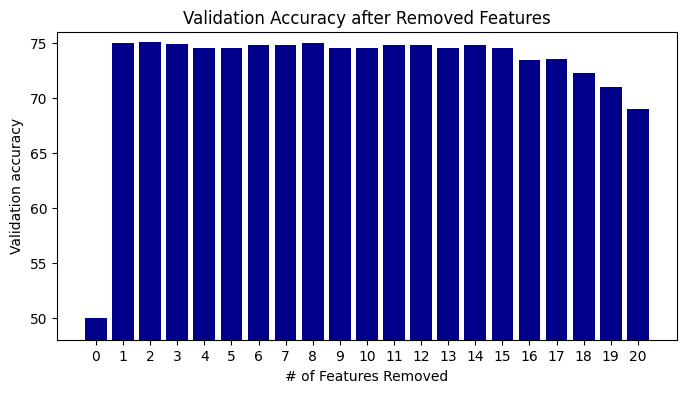

In [ ]:
fig = plt.figure(figsize = (8, 4))

df_val_accuracy = df_val_accuracy.squeeze()
df_model_count = df_model_count.squeeze()

plt.bar(df_model_count, df_val_accuracy, color="darkblue", width=0.8)

plt.xlabel("# of Features Removed")
plt.xticks(np.arange(0, 21, 1))
plt.ylim(48, 76)
plt.ylabel("Validation accuracy")
plt.title("Validation Accuracy after Removed Features")

plt.show()